In [36]:
import pandas as pd
import pandas_profiling
# from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_column', 1000)
pd.options.display.float_format = '{:.2f}'.format

import random
from tqdm.autonotebook import tqdm
import string
import re

**<주제>**  <br><br>
**배달 호출데이터 분석을 통한 배달서비스와 식당 활성화 방안 제시**<br><br>
분석 주제 예시 <br>
1) 부천 특정 지역의 배달 서비스 활성화 전략 <br>
2) 코로나 19로 인한 배달 패턴의 변화 분석<br>
3) 부천시 음식 자영업자를 위한 마케팅<br>
4) 특정 지역 혹은 업소의 수요 예측<br><br>

**제공데이터** <br>
부천 지역의 2019.08~2020.11까지의 배달호출 데이터


# 우리의 주제: 부천시 신규 창업자를 위한 개업 지역 및 업종 추천

# data Load

In [454]:
df = pd.read_csv('./data.csv', header=None)
print(df.shape)
df.head()

(1110762, 32)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,130707,2019-07-10,C000077,2,C000077,S0021794,돈까스/일식,4119011500,경기도,부천시,옥길동,\N,4119079500,411904853794,4119011500,경기도,부천시,옥길동,\N,4119079500,411903185011,D0000884,3000,0,19000,3,NaN,2019-07-10 14:58:33,2019-07-10 14:59:06,2019-07-10 14:59:30,\N,2019-07-10 15:02:34
1,131807,2019-07-10,C000077,2,C000077,S0021648,치킨,4119011500,경기도,부천시,옥길동,\N,4119079500,411903185011,4119011500,경기도,부천시,옥길동,\N,4119079500,411904853793,D0000884,3000,0,23000,1,승인:,2019-07-10 15:57:08,2019-07-10 15:57:35,2019-07-10 15:57:48,\N,2019-07-10 15:59:01
2,132366,2019-07-10,C000077,2,C000077,S0021648,치킨,4119011500,경기도,부천시,옥길동,\N,4119079500,411903185011,4119011500,경기도,부천시,옥길동,\N,4119079500,411903185011,D0000884,3000,0,23000,3,NaN,2019-07-10 15:49:46,2019-07-10 15:50:13,2019-07-10 15:50:49,\N,2019-07-10 15:51:52
3,132714,2019-07-10,C000077,2,C000077,S0021884,돈까스/일식,4119011500,경기도,부천시,옥길동,\N,4119079500,411904853797,4119011500,경기도,부천시,옥길동,\N,4119079500,411904853793,D0000884,3000,0,16000,1,NaN,2019-07-10 16:09:59,2019-07-10 16:10:26,\N,\N,2019-07-10 16:15:37
4,133307,2019-07-10,C000077,2,C000077,S0021803,아시안/양식,4119011500,경기도,부천시,옥길동,\N,4119079500,411903185011,4119011500,경기도,부천시,옥길동,\N,4119079500,411903185011,D0000884,3000,0,38700,1,NaN,2019-07-10 16:59:54,2019-07-10 17:00:12,2019-07-10 17:00:27,\N,2019-07-10 17:03:50


## 컬럼명 변경

In [455]:
col = ['순번', '처리일', '배달요청업체id', '배달요청상태', '배달접수회사id', '배달상점id', '배달상점업종명',
      '배달상점_주소코드', '배달상점_시도', '배달상점_시군구', '배달상점_읍면동', '배달상점_리',
      '배달상점_행정동코드', '배달상점_도로명주소코드', '배달목적지_법정동코드', '배달목적지_시도',
      '배달목적지_시군구', '배달목적지_읍면동', '배달목적지_리', '배달목적지_행정동코드', '배달목적지_도로명주소코드', 
       '배달기사id', '배달비용', '호출중계수수료금액', '배달상품금액', '결제종류번호', '결제카드종류', '배달접수시간', 
       '배달배차시간', '배달수령시간', '배달완료시간', '배달취소시간'
      ]
data = df.copy()
data.columns = col
data.head(3)

,순번,처리일,배달요청업체id,배달요청상태,배달접수회사id,배달상점id,배달상점업종명,배달상점_주소코드,배달상점_시도,배달상점_시군구,배달상점_읍면동,배달상점_리,배달상점_행정동코드,배달상점_도로명주소코드,배달목적지_법정동코드,배달목적지_시도,배달목적지_시군구,배달목적지_읍면동,배달목적지_리,배달목적지_행정동코드,배달목적지_도로명주소코드,배달기사id,배달비용,호출중계수수료금액,배달상품금액,결제종류번호,결제카드종류,배달접수시간,배달배차시간,배달수령시간,배달완료시간,배달취소시간
0,130707,2019-07-10,C000077,2,C000077,S0021794,돈까스/일식,4119011500,경기도,부천시,옥길동,\N,4119079500,411904853794,4119011500,경기도,부천시,옥길동,\N,4119079500,411903185011,D0000884,3000,0,19000,3,NaN,2019-07-10 14:58:33,2019-07-10 14:59:06,2019-07-10 14:59:30,\N,2019-07-10 15:02:34
1,131807,2019-07-10,C000077,2,C000077,S0021648,치킨,4119011500,경기도,부천시,옥길동,\N,4119079500,411903185011,4119011500,경기도,부천시,옥길동,\N,4119079500,411904853793,D0000884,3000,0,23000,1,승인:,2019-07-10 15:57:08,2019-07-10 15:57:35,2019-07-10 15:57:48,\N,2019-07-10 15:59:01
2,132366,2019-07-10,C000077,2,C000077,S0021648,치킨,4119011500,경기도,부천시,옥길동,\N,4119079500,411903185011,4119011500,경기도,부천시,옥길동,\N,4119079500,411903185011,D0000884,3000,0,23000,3,NaN,2019-07-10 15:49:46,2019-07-10 15:50:13,2019-07-10 15:50:49,\N,2019-07-10 15:51:52


# data info & description

## data info

In [456]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110762 entries, 0 to 1110761
Data columns (total 32 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   순번             1110762 non-null  int64 
 1   처리일            1110762 non-null  object
 2   배달요청업체id       1110762 non-null  object
 3   배달요청상태         1110762 non-null  int64 
 4   배달접수회사id       1110762 non-null  object
 5   배달상점id         1110762 non-null  object
 6   배달상점업종명        1110762 non-null  object
 7   배달상점_주소코드      1110762 non-null  int64 
 8   배달상점_시도        1110762 non-null  object
 9   배달상점_시군구       1110762 non-null  object
 10  배달상점_읍면동       1110762 non-null  object
 11  배달상점_리         1110762 non-null  object
 12  배달상점_행정동코드     1110762 non-null  int64 
 13  배달상점_도로명주소코드   1110762 non-null  object
 14  배달목적지_법정동코드    1110762 non-null  int64 
 15  배달목적지_시도       1110762 non-null  object
 16  배달목적지_시군구      1110762 non-null  object
 17  배달목적지_읍면동      1110762 non-

## data description

In [457]:
data.describe()

,순번,배달요청상태,배달상점_주소코드,배달상점_행정동코드,배달목적지_법정동코드,배달목적지_행정동코드,배달비용,호출중계수수료금액,배달상품금액,결제종류번호
count,1110762.00,1110762.00,1110762.00,1110762.00,1110762.00,1110762.00,1110762.00,1110762.00,1110762.00,1110762.00
mean,8382540.12,1.02,4119010876.31,4119070108.83,3994874462.30,3994935455.57,3705.50,224.40,21188.01,1.82
std,4506893.51,0.12,466.21,8246.68,553967093.38,553966189.48,757.49,61.14,12575.52,0.52
min,130707.00,1.00,4119010100.00,4119060300.00,1144012700.00,1144074000.00,0.00,0.00,0.00,1.00
25%,4544480.00,1.00,4119010700.00,4119060600.00,4119010700.00,4119060600.00,3200.00,200.00,15500.00,2.00
50%,7778907.50,1.00,4119010800.00,4119074200.00,4119010900.00,4119074400.00,3500.00,200.00,20000.00,2.00
75%,11870693.75,1.00,4119011300.00,4119079500.00,4119011200.00,4119075000.00,4000.00,300.00,26500.00,2.00
max,17906265.00,2.00,4119012400.00,4119083000.00,5011013700.00,5011065000.00,34000.00,11089.00,1000000.00,3.00


* 배달비용 최솟값: 0, 최댓값: 34000
* 배달상품금액 최댓값: 1,000,000 
<br> 이상치로 추정되는 값들 존재

In [458]:
data.describe(include='object')

,처리일,배달요청업체id,배달접수회사id,배달상점id,배달상점업종명,배달상점_시도,배달상점_시군구,배달상점_읍면동,배달상점_리,배달상점_도로명주소코드,배달목적지_시도,배달목적지_시군구,배달목적지_읍면동,배달목적지_리,배달목적지_도로명주소코드,배달기사id,결제카드종류,배달접수시간,배달배차시간,배달수령시간,배달완료시간,배달취소시간
count,1110762,1110762,1110762,1110762,1110762,1110762,1110762,1110762,1110762,1110762,1110762,1110762,1110762,1110762,1110762,1110762,272044,1110762,1110762,1110762,1110762,1110762
unique,502,24,21,1519,15,1,1,18,1,241,11,30,72,4,2034,1880,33,1060011,1058200,1054341,1054737,17288
top,2020-01-06,C000254,C000254,S0021041,치킨,경기도,부천시,중동,\N,411903185011,경기도,부천시,중동,\N,411903186021,D0004887,승인:비씨카드사,2019-10-15 19:49:36,\N,\N,\N,\N
freq,5340,321055,277391,16481,270330,1110762,1110762,251579,1110762,70065,1050954,1048642,214469,1110758,47925,17430,79002,8,13009,17227,17251,1093339


1) 배달상점업종 : 치킨이 제일 많음  <br>
2) 배달상점읍면동 : 중동이 제일 많음 <br>
3) 배달목적지법정동읍면동명 : 역시 중동이 제일 많음 <br>
4) 결제카드종류 : null 많음

## data report

In [459]:
# profile = ProfileReport(data, title="배달데이터 report")
# profile.to_file("profile.html")

## 결측치 확인

In [460]:
data.isnull().sum()

순번                    0
처리일                   0
배달요청업체id              0
배달요청상태                0
배달접수회사id              0
배달상점id                0
배달상점업종명               0
배달상점_주소코드             0
배달상점_시도               0
배달상점_시군구              0
배달상점_읍면동              0
배달상점_리                0
배달상점_행정동코드            0
배달상점_도로명주소코드          0
배달목적지_법정동코드           0
배달목적지_시도              0
배달목적지_시군구             0
배달목적지_읍면동             0
배달목적지_리               0
배달목적지_행정동코드           0
배달목적지_도로명주소코드         0
배달기사id                0
배달비용                  0
호출중계수수료금액             0
배달상품금액                0
결제종류번호                0
결제카드종류           838718
배달접수시간                0
배달배차시간                0
배달수령시간                0
배달완료시간                0
배달취소시간                0
dtype: int64

<AxesSubplot:>

<Figure size 720x576 with 0 Axes>

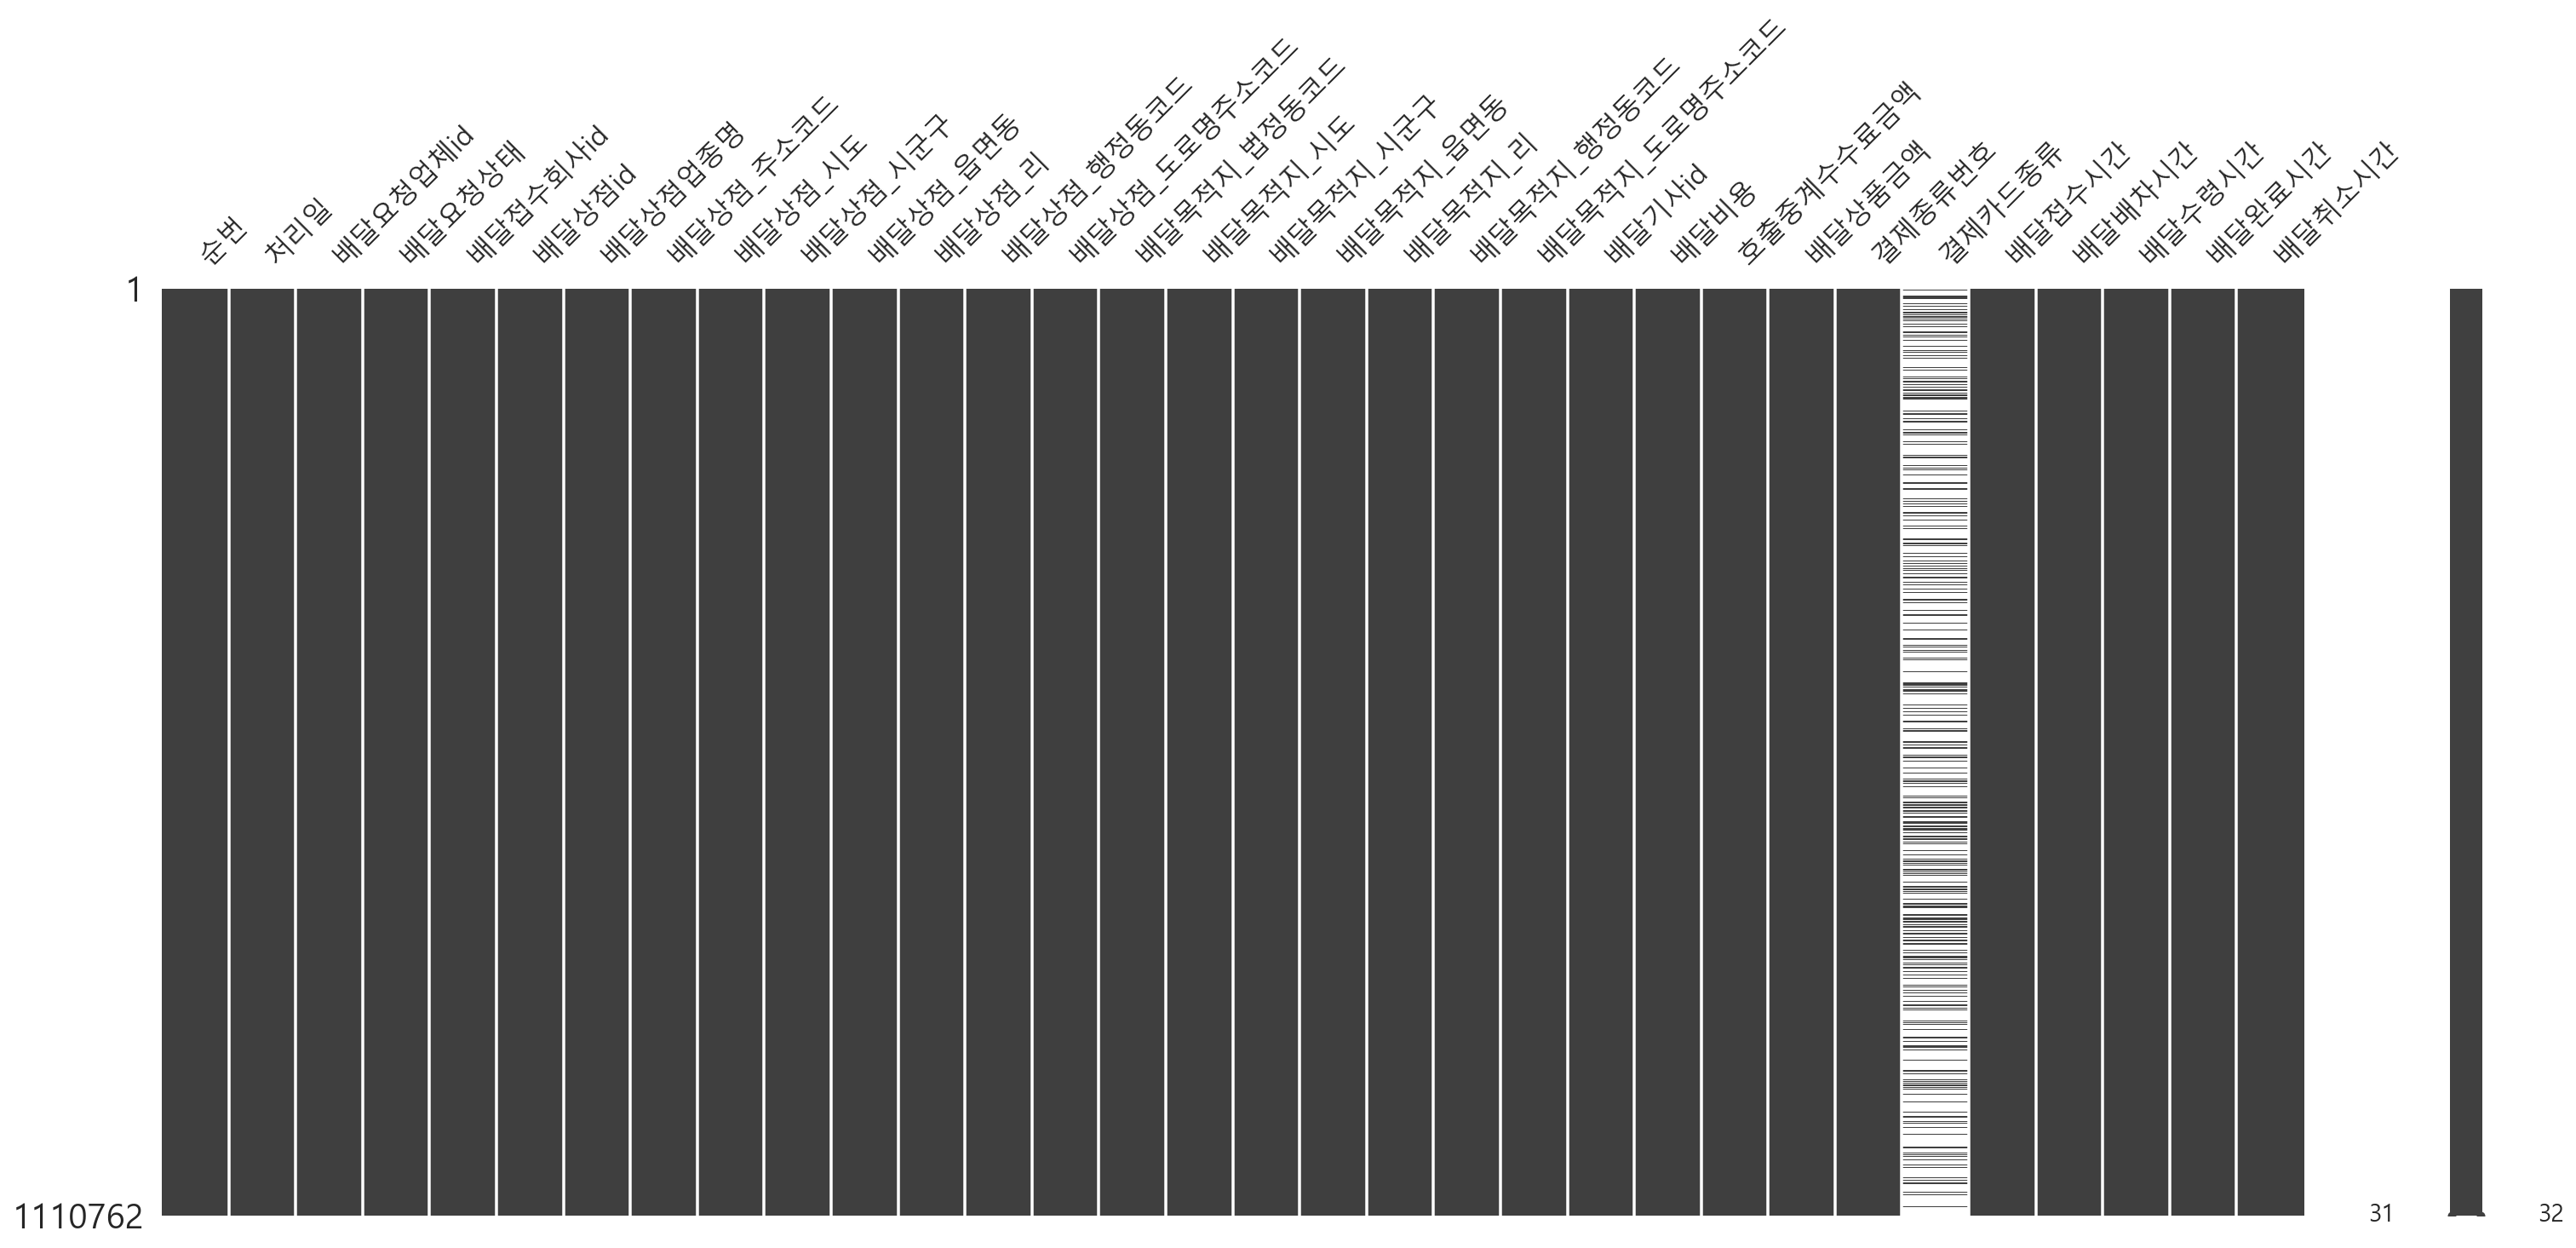

In [461]:
import missingno
plt.figure(figsize=(10, 8))
missingno.matrix(data)

결측치 : 컬럼 26외(결제카드종류)의 다른 컬럼에는 결측치 없음
* 주의: 이후 전처리 과정에서 \N으로 표현된 값들 다수 발견함 --> 결측치 추정

* "배달요청상태값 1 : 완료, 2 : 취소, 3 : 사고, 4 : 문의" <br><br>
* "결제종류번호 1:카드, 2:선불, 3:현금, 4:현->카, 5:카->현, 6:카->선, 7:선->카, 8:선->현, 9:현->선, 10:후불, 11:-" 



# preprocessing

In [462]:
data.head(2)

,순번,처리일,배달요청업체id,배달요청상태,배달접수회사id,배달상점id,배달상점업종명,배달상점_주소코드,배달상점_시도,배달상점_시군구,배달상점_읍면동,배달상점_리,배달상점_행정동코드,배달상점_도로명주소코드,배달목적지_법정동코드,배달목적지_시도,배달목적지_시군구,배달목적지_읍면동,배달목적지_리,배달목적지_행정동코드,배달목적지_도로명주소코드,배달기사id,배달비용,호출중계수수료금액,배달상품금액,결제종류번호,결제카드종류,배달접수시간,배달배차시간,배달수령시간,배달완료시간,배달취소시간
0,130707,2019-07-10,C000077,2,C000077,S0021794,돈까스/일식,4119011500,경기도,부천시,옥길동,\N,4119079500,411904853794,4119011500,경기도,부천시,옥길동,\N,4119079500,411903185011,D0000884,3000,0,19000,3,NaN,2019-07-10 14:58:33,2019-07-10 14:59:06,2019-07-10 14:59:30,\N,2019-07-10 15:02:34
1,131807,2019-07-10,C000077,2,C000077,S0021648,치킨,4119011500,경기도,부천시,옥길동,\N,4119079500,411903185011,4119011500,경기도,부천시,옥길동,\N,4119079500,411904853793,D0000884,3000,0,23000,1,승인:,2019-07-10 15:57:08,2019-07-10 15:57:35,2019-07-10 15:57:48,\N,2019-07-10 15:59:01


## 결측치 처리

In [463]:
# 결측치 많았던 결제카드종류 컬럼
print(f"결제카드종류 결측치: {data['결제카드종류'].isnull().sum()}개")
    
# 결제카드종류 컬럼 제거
data.drop(columns=['결제카드종류'], axis=1, inplace=True)

결제카드종류 결측치: 838718개


In [464]:
data.head(1)

,순번,처리일,배달요청업체id,배달요청상태,배달접수회사id,배달상점id,배달상점업종명,배달상점_주소코드,배달상점_시도,배달상점_시군구,배달상점_읍면동,배달상점_리,배달상점_행정동코드,배달상점_도로명주소코드,배달목적지_법정동코드,배달목적지_시도,배달목적지_시군구,배달목적지_읍면동,배달목적지_리,배달목적지_행정동코드,배달목적지_도로명주소코드,배달기사id,배달비용,호출중계수수료금액,배달상품금액,결제종류번호,배달접수시간,배달배차시간,배달수령시간,배달완료시간,배달취소시간
0,130707,2019-07-10,C000077,2,C000077,S0021794,돈까스/일식,4119011500,경기도,부천시,옥길동,\N,4119079500,411904853794,4119011500,경기도,부천시,옥길동,\N,4119079500,411903185011,D0000884,3000,0,19000,3,2019-07-10 14:58:33,2019-07-10 14:59:06,2019-07-10 14:59:30,\N,2019-07-10 15:02:34


In [465]:
# \N, NaN과 같은 값 확인
print(len(data.loc[data['배달요청업체id'].isin(['\\N'])]))
print(len(data.loc[data['배달요청상태'].isin(['\\N'])]))
print(len(data.loc[data['배달접수회사id'].isin(['\\N'])]))
print(len(data.loc[data['배달상점id'].isin(['\\N'])]))
print(len(data.loc[data['배달상점업종명'].isin(['\\N'])]))
print(len(data.loc[data['배달상점_주소코드'].isin(['\\N'])]))
print(len(data.loc[data['배달상점_읍면동'].isin(['\\N'])]))
print(len(data.loc[data['배달상점_리'].isin(['\\N'])]))
print(len(data.loc[data['배달상점_행정동코드'].isin(['\\N'])]))
print(len(data.loc[data['배달상점_도로명주소코드'].isin(['\\N'])]))
print(len(data.loc[data['배달목적지_법정동코드'].isin(['\\N'])]))
print(len(data.loc[data['배달목적지_읍면동'].isin(['\\N'])]))
print(len(data.loc[data['배달목적지_리'].isin(['\\N'])]))
print(len(data.loc[data['배달목적지_행정동코드'].isin(['\\N'])]))
print(len(data.loc[data['배달목적지_도로명주소코드'].isin(['\\N'])]))
print(len(data.loc[data['배달기사id'].isin(['\\N'])]))
print(len(data.loc[data['배달비용'].isin(['\\N'])]))
print(len(data.loc[data['배달접수시간'].isin(['\\N'])]))
print(len(data.loc[data['배달배차시간'].isin(['\\N'])]))
print(len(data.loc[data['배달수령시간'].isin(['\\N'])]))
print(len(data.loc[data['배달완료시간'].isin(['\\N'])]))
print(len(data.loc[data['배달취소시간'].isin(['\\N'])]))

0
0
13330
0
0
0
0
1110762
0
20849
0
0
1110758
0
42568
13002
0
0
13009
17227
17251
1093339


**\N 존재하는 컬럼**<br><br>

* 배달접수회사id, 배달상점_리, 배달상점_도로명주소코드, 배달목적지_리, 배달목적지_도로명주소코드, 배달기사id, 배달배차시간, 배달수령시간, 배달완료시간, 배달취소시간

In [466]:
# \N을 null 데이터로 변환

def convert_null(row):
    if pd.isnull(row):
        return np.nan
    elif row == '\\N':
        return np.nan
    else:
        return row

data['배달접수회사id'] = data['배달취소시간'].apply(convert_null)
data['배달상점_리'] = data['배달상점_리'].apply(convert_null)
data['배달상점_도로명주소코드'] = data['배달상점_도로명주소코드'].apply(convert_null)
data['배달목적지_리'] = data['배달목적지_리'].apply(convert_null)
data['배달목적지_도로명주소코드'] = data['배달목적지_도로명주소코드'].apply(convert_null)
data['배달기사id'] = data['배달기사id'].apply(convert_null)
data['배달배차시간'] = data['배달배차시간'].apply(convert_null)
data['배달수령시간'] = data['배달수령시간'].apply(convert_null)
data['배달완료시간'] = data['배달완료시간'].apply(convert_null)
data['배달취소시간'] = data['배달취소시간'].apply(convert_null)

## 날짜 --> DATETIME 변환

<처리일, 배달접수시간, 배달배차시간, 배달수령시간, 배달완료시간, 배달취소시간> Data Type 변환

In [467]:
from tqdm import tqdm
tqdm.pandas(desc="my bar!")

def convert_datetime(row):
    if pd.isnull(row):
        return np.nan
    else:
        return pd.to_datetime(row)

data['처리일'] = data['처리일'].progress_apply(convert_datetime)
data['배달접수시간'] = data['배달접수시간'].progress_apply(convert_datetime)
data['배달배차시간'] = data['배달배차시간'].progress_apply(convert_datetime)
data['배달수령시간'] = data['배달수령시간'].progress_apply(convert_datetime)
data['배달완료시간'] = data['배달완료시간'].progress_apply(convert_datetime)
data['배달취소시간'] = data['배달취소시간'].progress_apply(convert_datetime)
data[['처리일', '배달접수시간', '배달배차시간', '배달수령시간', '배달완료시간', '배달취소시간']].head()

my bar!: 100%|█████████████████████████████████████████████████| 1110762/1110762 [00:03<00:00, 297205.38it/s]


,처리일,배달접수시간,배달배차시간,배달수령시간,배달완료시간,배달취소시간
0,2019-07-10,2019-07-10 14:58:33,2019-07-10 14:59:06,2019-07-10 14:59:30,NaT,2019-07-10 15:02:34
1,2019-07-10,2019-07-10 15:57:08,2019-07-10 15:57:35,2019-07-10 15:57:48,NaT,2019-07-10 15:59:01
2,2019-07-10,2019-07-10 15:49:46,2019-07-10 15:50:13,2019-07-10 15:50:49,NaT,2019-07-10 15:51:52
3,2019-07-10,2019-07-10 16:09:59,2019-07-10 16:10:26,NaT,NaT,2019-07-10 16:15:37
4,2019-07-10,2019-07-10 16:59:54,2019-07-10 17:00:12,2019-07-10 17:00:27,NaT,2019-07-10 17:03:50


In [468]:
# 결측치 최종 확인 및 처리
data.isnull().sum()

순번                     0
처리일                    0
배달요청업체id               0
배달요청상태                 0
배달접수회사id         1093339
배달상점id                 0
배달상점업종명                0
배달상점_주소코드              0
배달상점_시도                0
배달상점_시군구               0
배달상점_읍면동               0
배달상점_리           1110762
배달상점_행정동코드             0
배달상점_도로명주소코드       20849
배달목적지_법정동코드            0
배달목적지_시도               0
배달목적지_시군구              0
배달목적지_읍면동              0
배달목적지_리          1110758
배달목적지_행정동코드            0
배달목적지_도로명주소코드      42568
배달기사id             13002
배달비용                   0
호출중계수수료금액              0
배달상품금액                 0
결제종류번호                 0
배달접수시간                 0
배달배차시간             13009
배달수령시간             17227
배달완료시간             17251
배달취소시간           1093339
dtype: int64

**결측치 많은 컬럼들 중 분석에 큰 의미를 지니지 않는 컬럼들**
* 배달상점_리(1110762)
* 배달목적지_리(1110758)
* 배달취소시간(1093339)

## 불필요한 컬럼 삭제

In [469]:
'''
(1) 배달상점_리, 배달목적지_리 제거
(2) 배달취소시간은 보류
'''
data.drop(columns=['배달상점_리', '배달목적지_리'], axis=1, inplace=True)
data.head(2)

,순번,처리일,배달요청업체id,배달요청상태,배달접수회사id,배달상점id,배달상점업종명,배달상점_주소코드,배달상점_시도,배달상점_시군구,배달상점_읍면동,배달상점_행정동코드,배달상점_도로명주소코드,배달목적지_법정동코드,배달목적지_시도,배달목적지_시군구,배달목적지_읍면동,배달목적지_행정동코드,배달목적지_도로명주소코드,배달기사id,배달비용,호출중계수수료금액,배달상품금액,결제종류번호,배달접수시간,배달배차시간,배달수령시간,배달완료시간,배달취소시간
0,130707,2019-07-10,C000077,2,2019-07-10 15:02:34,S0021794,돈까스/일식,4119011500,경기도,부천시,옥길동,4119079500,411904853794,4119011500,경기도,부천시,옥길동,4119079500,411903185011,D0000884,3000,0,19000,3,2019-07-10 14:58:33,2019-07-10 14:59:06,2019-07-10 14:59:30,NaT,2019-07-10 15:02:34
1,131807,2019-07-10,C000077,2,2019-07-10 15:59:01,S0021648,치킨,4119011500,경기도,부천시,옥길동,4119079500,411903185011,4119011500,경기도,부천시,옥길동,4119079500,411904853793,D0000884,3000,0,23000,1,2019-07-10 15:57:08,2019-07-10 15:57:35,2019-07-10 15:57:48,NaT,2019-07-10 15:59:01


## 데이터 상태
배달요청상태
* 1 : 109339개
* 2 : 17423개

배달접수회사 id
* null(\N) : 13330개

배달상점 시도명 : 경기도 <br>

배달상점 시군구명 : 부천시

배달상점 도로명주소코드
* null(\N) : 20849개

배달목적지 법정동 시도명
* 경기도 : 1050954개
* 서울특별시 : 36190개
* 인천광역시 : 32607개
* 그 외 : 11

배달목적지 도로명주소 코드
* null(\N) : 42568개

배달기사 id
* null(\N) : 13002개

배달비용
* 0 : 199
* 3 : 2
* 10 : 1
* 100 : 1
* 200 : 1

배달상품금액
* 0 : 105193개

결제종류번호
* 1 : 272856(카드)
* 2 : 769366(선불)
* 3 : 68540(현금)

# EDA

## 배달요청업체, 배달접수회사, 배달상점, 배달목적지는 몇 곳일까?(unique 값)

In [470]:
print(f"배달요청업체 unique count: {data['배달요청업체id'].nunique()}")
print(f"주문수 unique count: {data['순번'].nunique()}")
print(f"배달접수회사 unique count: {data['배달접수회사id'].nunique()}")
print(f"배달상점 unique count: {data['배달상점id'].nunique()}")
print(f"배달목적지 unique count: {data['배달목적지_행정동코드'].nunique()}")

배달요청업체 unique count: 24
주문수 unique count: 1110762
배달접수회사 unique count: 17287
배달상점 unique count: 1519
배달목적지 unique count: 93


* 배달요청업체 : 24곳
* 주문수 : 1110762
* 배달접수회사: 17287곳
* 배달상점: 1519곳
* 배달목적지(행정동코드기준): 93곳

## 상관관계

Text(0.5, 1.0, '배달비용 & 호출중계수수료')

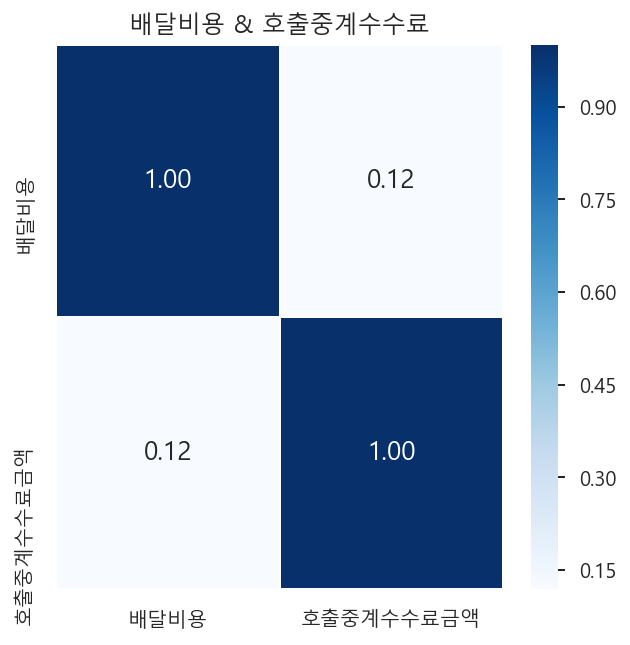

In [132]:
plt.figure(figsize=(5, 5))
sns.heatmap(data=data[['배달비용', '호출중계수수료금액']].corr(),
            annot=True,
            annot_kws={'size': 13},
            fmt='.2f',
            linewidths='.5',
            cmap='Blues')
plt.title('배달비용 & 호출중계수수료')

* 배달비용과 호출중계수수료금액 간의 상관관계 0.12로 무상관에 가까움

<Figure size 504x504 with 0 Axes>

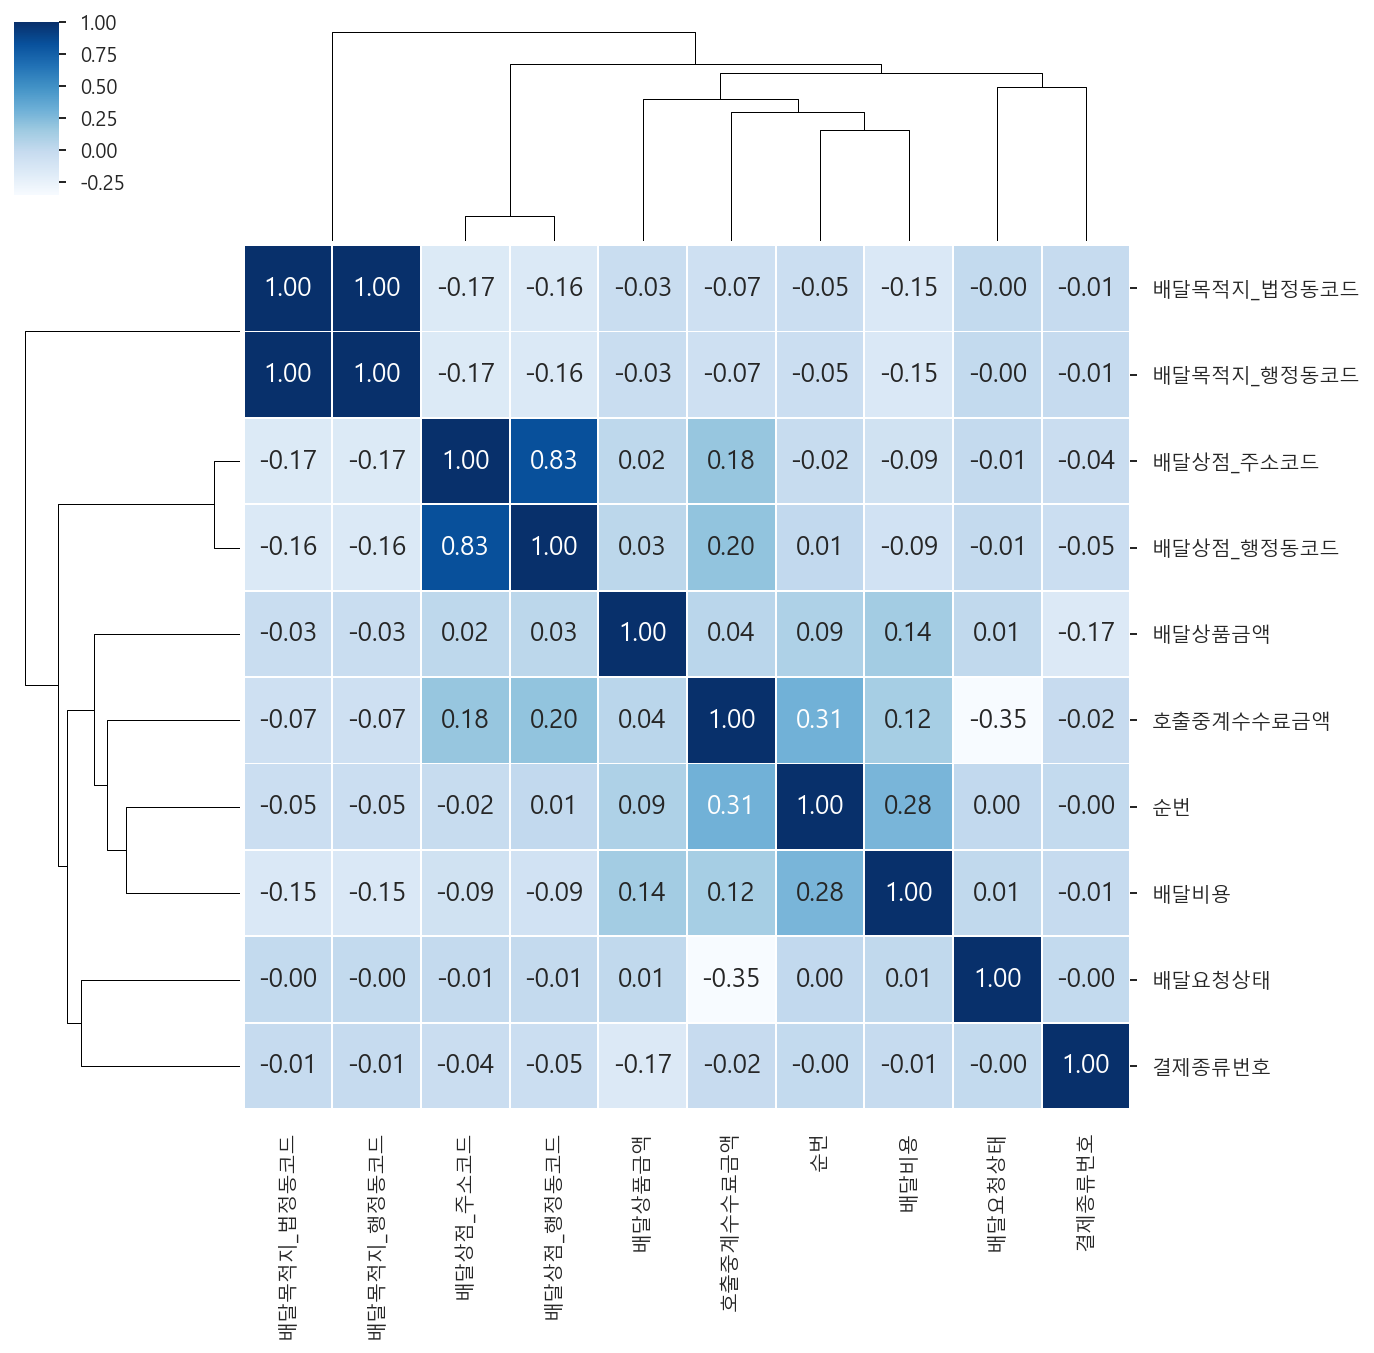

In [133]:
plt.figure(figsize=(7, 7))
sns.clustermap(data=data.corr(),
            annot=True,
            annot_kws={'size': 13},
            fmt='.2f',
            linewidths='.5',
            cmap='Blues')

* 배달목적지 법정동코드와 행정동코드 간에는 강한 양의 상관관계
* 배달상점 주소코드와 행정동코드 간에는 강한 양의 상관관계
* 딱히 유의미한 인사이트를 얻지는 못함

## 배달 처리일 총 기간

In [432]:
print(data['처리일'].min(), data['처리일'].max())

2019-07-10 00:00:00 2020-11-30 00:00:00


**2019년 7월 10일 ~ 2020년 11월 30일**

## 배달요청업체 & 배달요청상태 & 배달접수회사 id

In [137]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
f.set_size_inches(20, 8)
ax2.get_yaxis().get_major_formatter().set_scientific(False)
data['배달요청업체id'].value_counts().sort_values().plot(kind='barh', ax=ax1)
ax1.set_title('배달요청업체id bar graph')
data['배달요청상태'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_title('배달요청상태 bar graph')
data['배달접수회사id'].value_counts().sort_values().plot(kind='barh', ax=ax3)
ax3.set_title('배달접수회사id bar graph')
ax1.grid(color='lightgrey', alpha=0.55)
ax2.grid(color='lightgrey', alpha=0.55)
ax3.grid(color='lightgrey', alpha=0.55)

Error in callback <function flush_figures at 0x000001ADD8130378> (for post_execute):


KeyboardInterrupt: 

* 배달요청업체 id 상위 10개 업체 <br>
C000254, C000077, C000238, C000240, C000253, C000250, C000032, C000591, C000330, C000040  <br> --> 이 배달요청업체들이 경기도민들이 많이 주문하는 가게들일 것<br><br>
* 배달요청상태는 1(완료)가 2(취소)에 비해 배달요청업체 id 상위 10개 업체 <br>
C000254, C000077, C000238, C000240, C000253, C000250, C000032, C000591, C000330, C000040  <br> --> 이 배달요청업체들이 경기도민들이 많이 주문하는 가게들일 것<br><br>
* 배달요청상태는 1(완료)가 2(취소)에 비해 압도적으로 많음 <br><br>
* 배달접수회사 id 상위 10개 업체 <br>
C000254, C000238, C000077, C000240, C000253, C000250, C000330, C000591, C000256, C000247<br>
 --> 배달접수회사와 배달요청업체가 중복되는 곳은 배달을 자체적으로 하는 가게일 것으로 보임

## 배달비용

In [433]:
data.head(2)

,순번,처리일,배달요청업체id,배달요청상태,배달접수회사id,배달상점id,배달상점업종명,배달상점_주소코드,배달상점_시도,배달상점_시군구,배달상점_읍면동,배달상점_행정동코드,배달상점_도로명주소코드,배달목적지_법정동코드,배달목적지_시도,배달목적지_시군구,배달목적지_읍면동,배달목적지_행정동코드,배달목적지_도로명주소코드,배달기사id,배달비용,호출중계수수료금액,배달상품금액,결제종류번호,배달접수시간,배달배차시간,배달수령시간,배달완료시간,배달취소시간
0,130707,2019-07-10,C000077,2,2019-07-10 15:02:34,S0021794,돈까스/일식,4119011500,경기도,부천시,옥길동,4119079500,411904853794,4119011500,경기도,부천시,옥길동,4119079500,411903185011,D0000884,3000,0,19000,3,2019-07-10 14:58:33,2019-07-10 14:59:06,2019-07-10 14:59:30,NaT,2019-07-10 15:02:34
1,131807,2019-07-10,C000077,2,2019-07-10 15:59:01,S0021648,치킨,4119011500,경기도,부천시,옥길동,4119079500,411903185011,4119011500,경기도,부천시,옥길동,4119079500,411904853793,D0000884,3000,0,23000,1,2019-07-10 15:57:08,2019-07-10 15:57:35,2019-07-10 15:57:48,NaT,2019-07-10 15:59:01


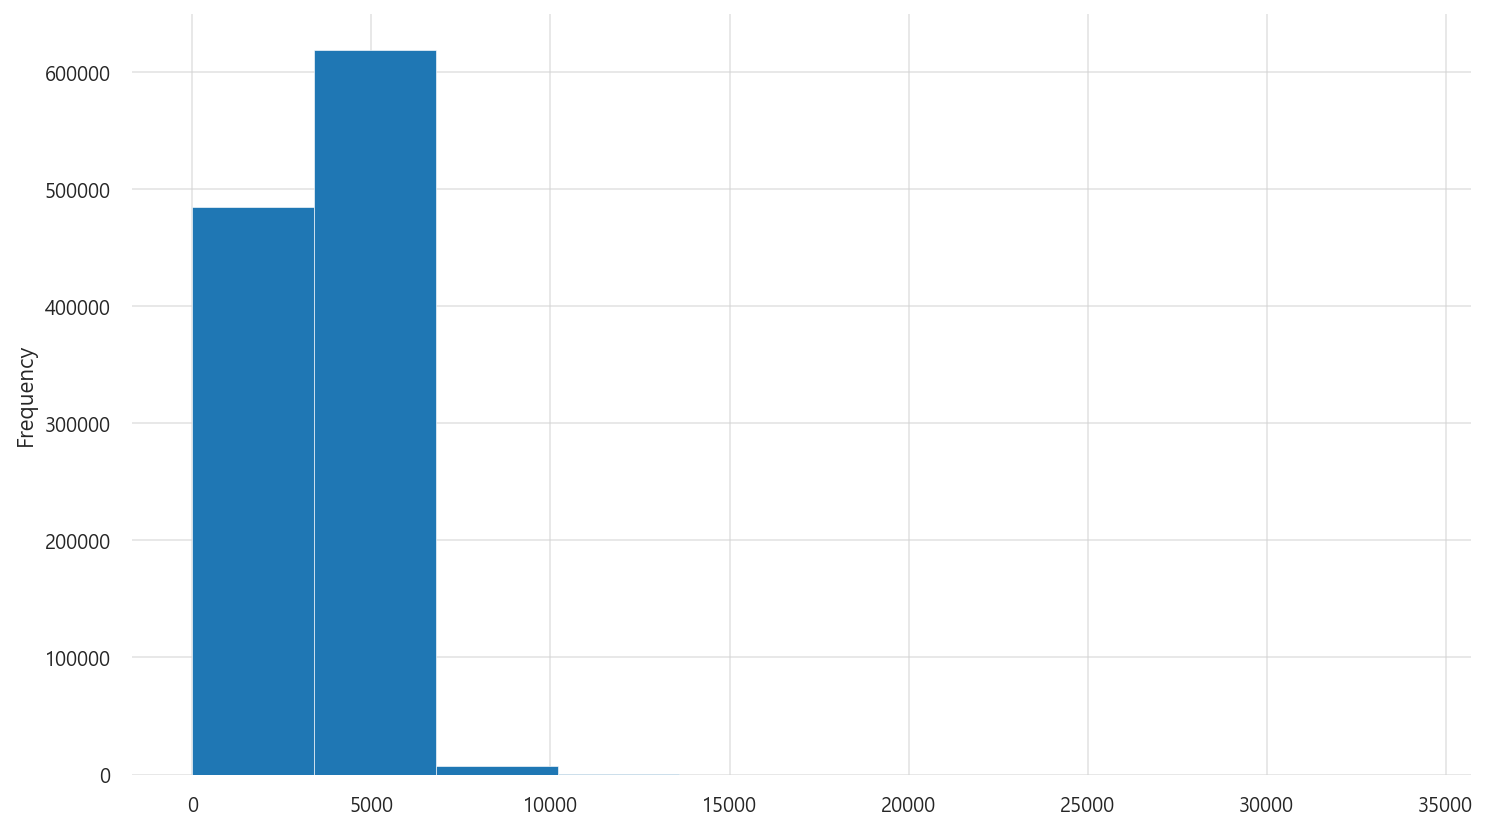

In [434]:
plt.figure(figsize=(12, 7))
a = data['배달비용'].plot(kind='hist')
a.get_xaxis().get_major_formatter().set_scientific(False)
plt.grid(color='lightgrey', alpha=0.5)

In [471]:
delivery_cost = data.pivot_table(index=['배달비용'],
                                 values=['순번'],
                                 aggfunc='count').sort_values(by='순번', ascending=False)
delivery_cost.head(5)

,순번
배달비용,
3000,241957
3300,202990
3500,112477
3630,105380
3800,82583


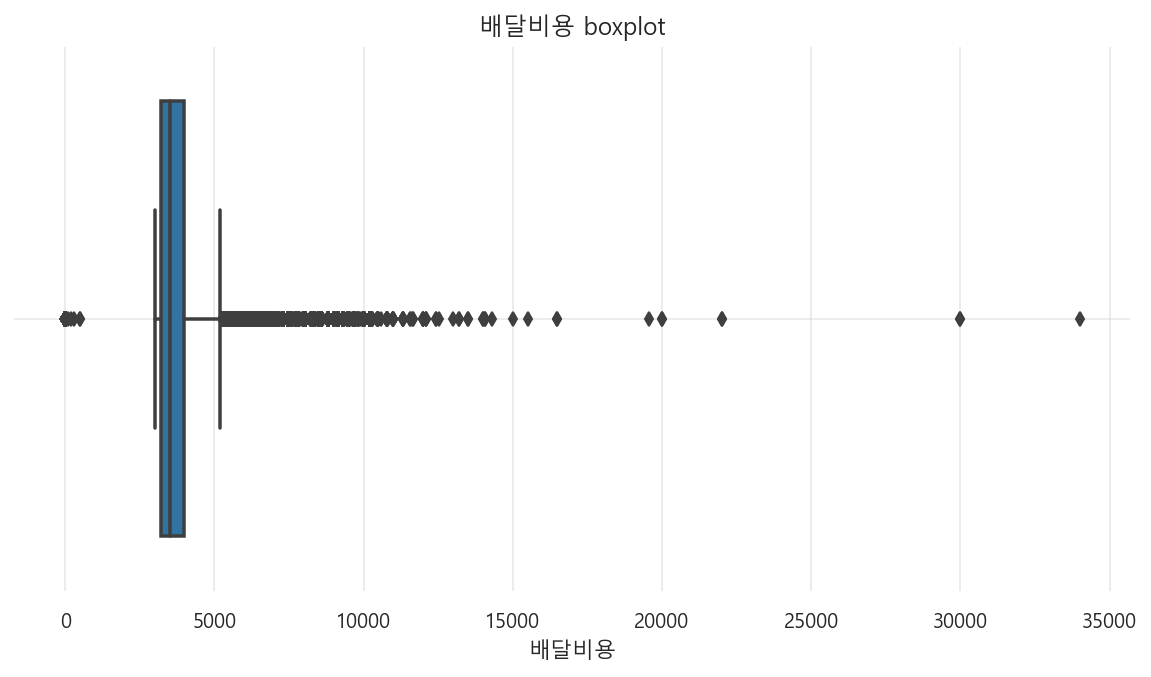

In [472]:
plt.figure(figsize=(10, 5))
plt.title('배달비용 boxplot')
sns.boxplot(data=data, x='배달비용')
plt.grid(color='lightgrey', alpha=0.43)

**배달비용**
* 3000, 3300원이 제일 많고 3500, 3630, 3800원이 그 뒤를 이음
* 배달비용은 3000원대가 제일 많음
* 제 1, 2, 3사분위수 모두 5000원 내에 위치함
* 배달비용이 5000원을 넘어가는 극단값들 많이 보임

In [473]:
# 배달비용 10000넘는 경우들 중 내림차순으로 TOP 10만
print(len(data.loc[data['배달비용'] >= 10000]))
data.loc[data['배달비용'] >= 10000].sort_values(by='배달비용', ascending=False).head(5)

264


,순번,처리일,배달요청업체id,배달요청상태,배달접수회사id,배달상점id,배달상점업종명,배달상점_주소코드,배달상점_시도,배달상점_시군구,배달상점_읍면동,배달상점_행정동코드,배달상점_도로명주소코드,배달목적지_법정동코드,배달목적지_시도,배달목적지_시군구,배달목적지_읍면동,배달목적지_행정동코드,배달목적지_도로명주소코드,배달기사id,배달비용,호출중계수수료금액,배달상품금액,결제종류번호,배달접수시간,배달배차시간,배달수령시간,배달완료시간,배달취소시간
494984,7022067,2020-03-12,C000254,1,NaN,S0020052,치킨,4119010900,경기도,부천시,상동,4119061000,411904352053,4119010100,경기도,부천시,원미동,4119060300,411904352434,D0009495,34000,200,29000,3,2020-03-12 17:11:52,2020-03-12 17:12:19,2020-03-12 17:51:06,2020-03-12 17:52:12,NaT
835228,11911379,2020-07-22,C000253,1,NaN,S0019494,피자,4119011300,경기도,부천시,괴안동,4119079500,411903000028,1165010800,서울특별시,서초구,서초동,1165053000,116503121024,D0005004,30000,0,0,2,2020-07-22 18:18:07,2020-07-22 18:18:14,2020-07-22 18:19:32,2020-07-22 19:32:12,NaT
835242,11911557,2020-07-22,C000253,1,NaN,S0019494,피자,4119011300,경기도,부천시,괴안동,4119079500,411903000028,1168011800,서울특별시,강남구,도곡동,1168065500,116802102001,D0005004,30000,0,0,2,2020-07-22 18:19:23,2020-07-22 18:19:27,2020-07-22 18:19:33,2020-07-22 19:47:16,NaT
611555,8542293,2020-04-21,C000254,1,NaN,S0020147,치킨,4119010900,경기도,부천시,상동,4119061000,411903184014,4119010800,경기도,부천시,중동,4119074200,411904352260,D0010088,22000,200,18500,1,2020-04-21 19:57:15,2020-04-21 20:04:26,2020-04-21 20:10:04,2020-04-21 20:37:42,NaT
558801,7824078,2020-04-03,C000077,1,NaN,S0021818,족발/보쌈,4119011500,경기도,부천시,옥길동,4119079500,411904853793,4119011000,경기도,부천시,소사본동,4119075000,411904355196,D0009644,22000,300,810000,1,2020-04-03 12:03:06,2020-04-03 12:03:45,2020-04-03 12:03:49,2020-04-03 12:04:58,NaT


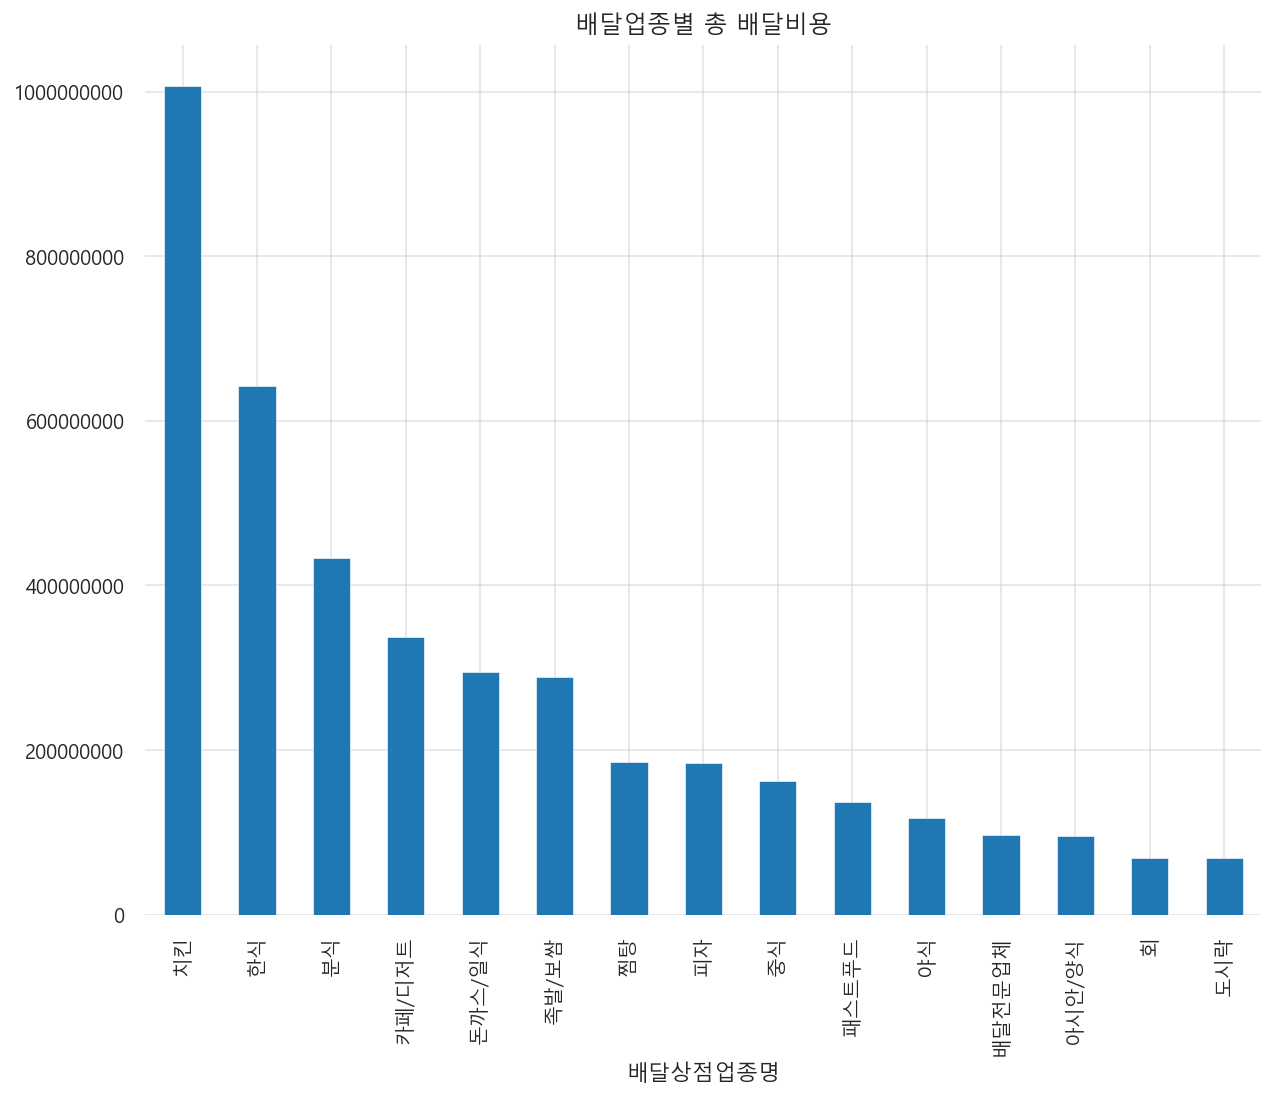

In [474]:
b = data.groupby(['배달상점업종명'])['배달비용'].\
                                                    sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 8))
b.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('배달업종별 총 배달비용')
plt.grid(color='lightgrey', alpha=0.5)

* 치킨의 총 배달비용이 제일 많았음
* 배달비용 이상치(10000원 이상) 제거 후 다시 확인해볼 것!

### 배달비용 10000원 이상인 264개 데이터 제거

배달비용이 10000원 이상인 경우는 일반적이지 않은 경우이므로 제거(배달비용 10000원 이상인 경우는 264개로 전체 데이터 개수에 비해 소수이므로 제거해도 전체 데이터에 훼손X)

In [475]:
print(data.shape)
data = data.loc[data['배달비용'] < 10000]
print(data.shape)

(1110762, 29)
(1110498, 29)


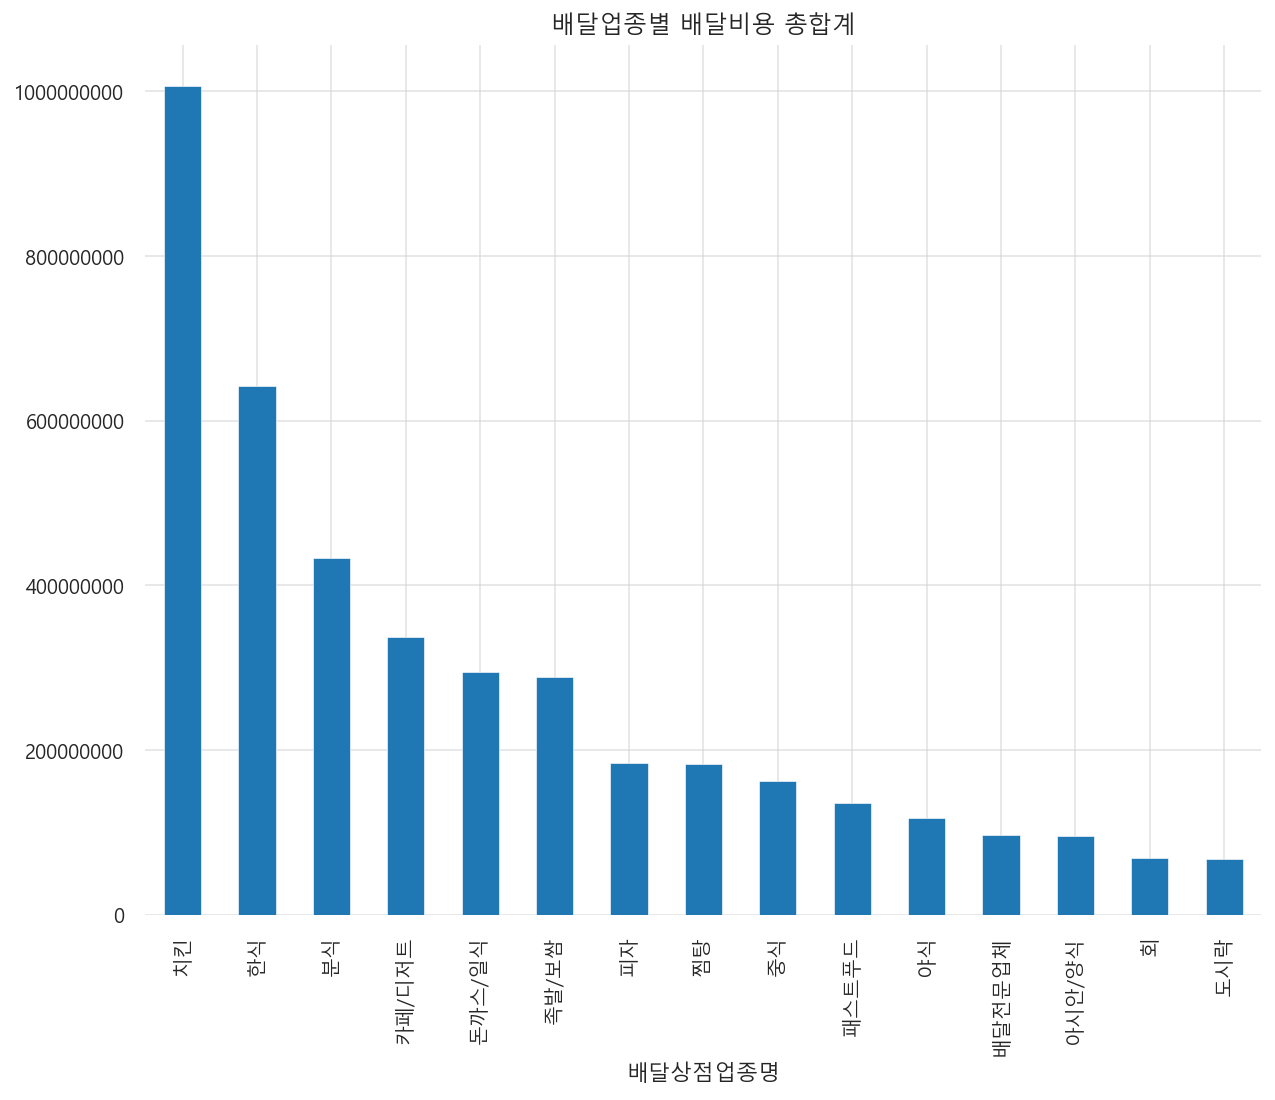

In [476]:
c = data.groupby(['배달상점업종명'])['배달비용'].\
                                                    sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 8))
c.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('배달업종별 배달비용 총합계')
plt.grid(color='lightgrey', alpha=0.5)

* 배달비용 10000원 이상인 경우 제거했더니 제거 이전과 차이 발생
* 피자(8위 --> 7위), 찜탕(7위-->8위)

* 배달 수요가 적은 지역 --> 왜 적었는지 배달비용 등 분석
* 최소주문금액
* 쿠팡이츠 수수료 3%
* 특정 시간에 배차시간이 지연되는 경우

* 가게 vs 배달서비스 
** 배달비용, 최소주문금액 **

In [477]:
data['배달상점업종명'].value_counts().sort_values(ascending=False)

치킨        270308
한식        171833
분식        118793
카페/디저트     97759
돈까스/일식     80157
족발/보쌈      76396
피자         50214
찜탕         44332
중식         43964
패스트푸드      39230
야식         29792
아시안/양식     25897
배달전문업체     25430
회          18379
도시락        18014
Name: 배달상점업종명, dtype: int64

* 인기 업종: 치킨, 한식, 분식, 카페/디저트, 돈까스/일식
* 비인기 업종: 도시락, 회, 아시안/양식, 야식

## 배달상점과 배달목적지 위치

In [478]:
# 중복 포함
display(data['배달상점_읍면동'].value_counts().to_frame())
display(data['배달목적지_읍면동'].value_counts().to_frame().head(18))

,배달상점_읍면동
중동,251567
심곡동,196724
옥길동,167146
상동,139800
괴안동,117867
원미동,46537
소사본동,41459
역곡동,39602
심곡본동,38908
송내동,32110


,배달목적지_읍면동
중동,214462
상동,130442
심곡동,114923
옥길동,114210
소사본동,84140
송내동,70531
괴안동,68609
심곡본동,49188
범박동,48884
역곡동,40734


## 목적지별 배달 count 상위 top 10

In [479]:
# 어느 동에서 배달 주문이 많았나
data.groupby(['배달목적지_읍면동'])['순번'].count().sort_values(ascending=False)[:10].reset_index().\
rename(columns={'순번':'배달목적지별 주문건수'}).style.background_gradient('Blues')

,배달목적지_읍면동,배달목적지별 주문건수
0,중동,214462
1,상동,130442
2,심곡동,114923
3,옥길동,114210
4,소사본동,84140
5,송내동,70531
6,괴안동,68609
7,심곡본동,49188
8,범박동,48884
9,역곡동,40734


## 배달상점 업종별 순위(중복은 1회만 count)

In [480]:
# 중동에 치킨업종 상점이 몇 개?
data_where = data.pivot_table(index='배달상점_읍면동', 
                              columns='배달상점업종명', 
                              values='배달상점id',
                              aggfunc=pd.Series.nunique,
                              fill_value=0,
                              margins=True).reset_index()
data_where

배달상점업종명,배달상점_읍면동,도시락,돈까스/일식,배달전문업체,분식,아시안/양식,야식,족발/보쌈,중식,찜탕,치킨,카페/디저트,패스트푸드,피자,한식,회,All
0,괴안동,0,8,0,15,0,1,4,0,2,36,9,5,17,12,0,109
1,내동,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,4
2,도당동,0,0,0,0,0,1,3,4,1,0,0,0,0,16,2,27
3,범박동,1,0,0,6,0,0,2,0,0,3,7,0,0,2,0,21
4,삼정동,0,0,11,0,0,0,0,0,0,1,3,10,0,12,0,37
5,상동,4,11,1,9,0,6,18,8,8,33,7,2,6,36,2,151
6,소사동,0,0,0,2,0,8,0,0,1,3,0,0,0,0,0,14
7,소사본동,0,0,1,8,2,4,2,9,12,11,15,0,3,4,0,71
8,송내동,0,1,0,3,0,2,4,1,0,10,9,1,3,8,0,42
9,심곡동,5,2,7,20,5,39,18,14,13,63,30,13,20,48,16,313


In [445]:
data['배달상점id'].nunique()

1519

* 심곡동, 중동, 옥길동, 상동, 원미동, 괴안동 순으로 배달상점이 많음(6개동에는 100개 이상의 배달상점 존재)
* 그 외의 동네는 100개 미만의 배달상점 존재
* 동네별로 개수가 많은 업종이 있음<br>
* 배달목적지(주문건수 기준)는 중동, 상동, 심곡동, 옥길동, 소사본동, 송내동, 괴안동, 심곡본동, 범박동, 역곡동 순으로 많았음<br><br>
## 👉 **그렇다면, 주문수가 많은 동네에 배달상점이 적게 위치해있다면, 동네별로 창업하면 괜찮을 배달 업종을 추천해주는 건 어떨까?**

## 배달상점 업종별 배달비용 총합

배달상점업종명,치킨,한식,분식,카페/디저트,돈까스/일식,족발/보쌈,피자,찜탕,중식,패스트푸드,야식,배달전문업체,아시안/양식,회,도시락
배달비용,1006127028,641783457,433013970,336691020,294978520,288159070,184191429,183440040,162178100,136016790,117696853,96636250,95569599,68405850,68120090


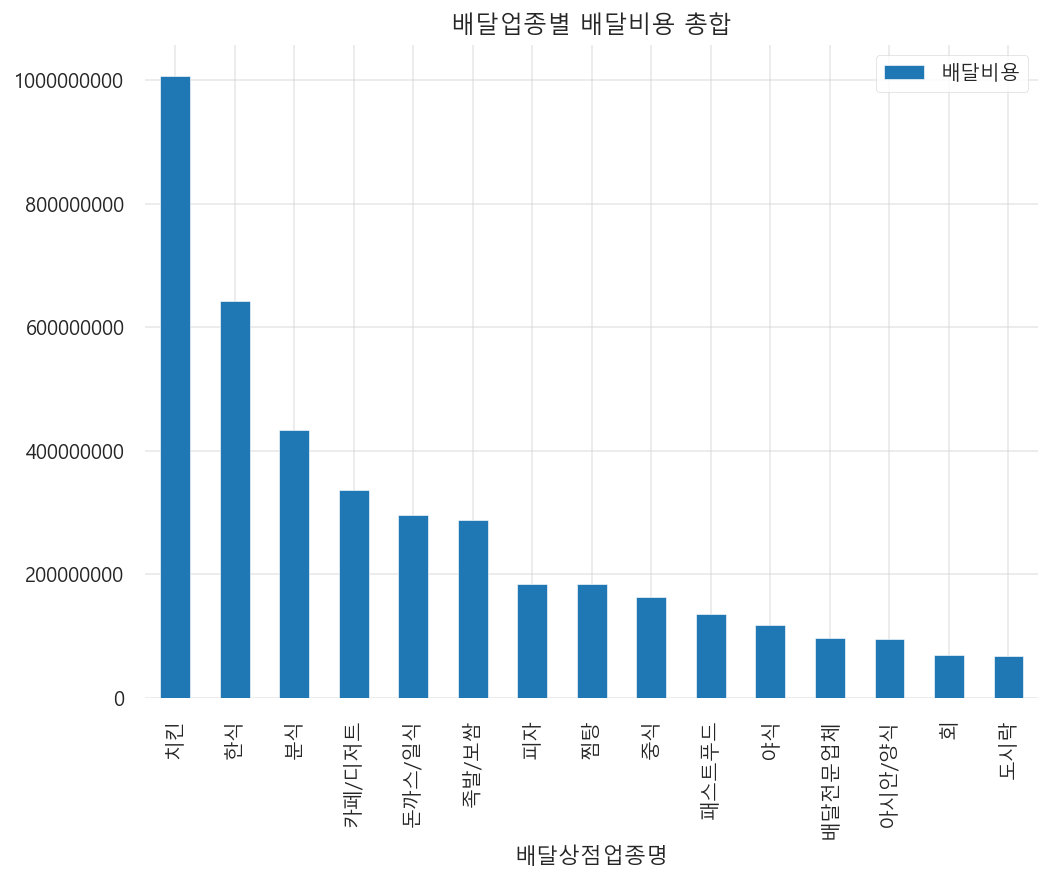

In [481]:
display(data.groupby(['배달상점업종명'])['배달비용'].sum().sort_values(ascending=False).to_frame().T)
ax = data.groupby(['배달상점업종명'])['배달비용'].sum().sort_values(ascending=False).to_frame().plot.bar(figsize=(8, 6))
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('배달업종별 배달비용 총합')
plt.grid(color='lightgrey', alpha=0.43)

## 배달상품금액

In [482]:
display(data['배달상품금액'].value_counts().sort_values(ascending=False).\
        head(6).to_frame().style.background_gradient(cmap='gray_r'))
display(data['배달상품금액'].value_counts(normalize=True).head(6).to_frame().style.background_gradient(cmap='Blues'))

,배달상품금액
0,105170
17000,42397
18000,40273
16000,36400
19000,34709
22000,30183


,배달상품금액
0,0.094705
17000,0.038178
18000,0.036266
16000,0.032778
19000,0.031255
22000,0.027180


* 배달상품금액 0원인 경우가 제일 많음: 9% <br><br>
==> 쿠폰 쓴 건가?(추정) ==> 배달상품금액 0원인 경우도 데이터에 포함시키고 분석할 것인가? ==> 의미있다고 판단되므로 제거하지 않음

## 배달기사 id

In [519]:
len(data['배달기사id'].value_counts())

1787

In [449]:
# 배달취소? (배달수령은 했는데 배달취소한 경우)
len(data.loc[(data['배달수령시간'].isnull()) & (data['배달취소시간'].notnull())].head(5))

5

* 배달 취소시킨 경우 <br>
==> drop? ==> 개수도 적고 그렇게 중요한 부분이 아니므로 제거하지 않음

## 부천 외의 지역?

In [450]:
data.head(1)

,순번,처리일,배달요청업체id,배달요청상태,배달접수회사id,배달상점id,배달상점업종명,배달상점_주소코드,배달상점_시도,배달상점_시군구,배달상점_읍면동,배달상점_행정동코드,배달상점_도로명주소코드,배달목적지_법정동코드,배달목적지_시도,배달목적지_시군구,배달목적지_읍면동,배달목적지_행정동코드,배달목적지_도로명주소코드,배달기사id,배달비용,호출중계수수료금액,배달상품금액,결제종류번호,배달접수시간,배달배차시간,배달수령시간,배달완료시간,배달취소시간
0,130707,2019-07-10,C000077,2,2019-07-10 15:02:34,S0021794,돈까스/일식,4119011500,경기도,부천시,옥길동,4119079500,411904853794,4119011500,경기도,부천시,옥길동,4119079500,411903185011,D0000884,3000,0,19000,3,2019-07-10 14:58:33,2019-07-10 14:59:06,2019-07-10 14:59:30,NaT,2019-07-10 15:02:34


In [483]:
display(data['배달상점_시도'].value_counts())
display(data['배달목적지_시도'].value_counts())

경기도    1110498
Name: 배달상점_시도, dtype: int64

경기도        1050849
서울특별시        36183
인천광역시        23462
제주특별자치도          1
부산광역시            1
대구광역시            1
전라북도             1
Name: 배달목적지_시도, dtype: int64

* 배달목적지에 경기도 외의 지역 존재 --> 제거

In [484]:
data = data.loc[data['배달목적지_시도'] == '경기도']
len(data)

1050849

# 주제 선정 및 분석

**주제 : 부천시에서 요식업을 하려는 신규 진입 자영업자를 위한 동네 & 업종 추천**<br>
* 추천 업종<br>
    * 수요가 많은 업종 추천
    * 지역 내 매장 수가 가장 많은 업종과, 평균 매출이 가장 적은 업종은 피할 것 <br>
    (업종 수로 배달매출을 나눠 평균값 구한 뒤 업종 당 평균 매출 시각화)
<br>
* 추천 지역 <br>
    * 주문건수가 많은 동네(배달목적지) 근처에 창업하면 접근성이 좋을 것
    * 월세가 비교적 낮은 동네
    * 업종 경쟁이 적은 곳

(배달 지역 - 지역-주요 시장(중동 주변 지역), 
창업지역 - 월세가 적은 지역에서 창업 후 배달(중동 주변부 배달이 쉽게 가능하면서 임대료가 비교적 저렴한지역-임대료자료 찾아보기, 업종 별 비교적 해당 업종 경쟁이 적은 곳(업종 별로 지역별 수 시각화 가능하면 동 별로 최다업종 3위까지 보여주기))


## 업종과 동네 추천

### 동네

In [520]:
data.head(2)

,순번,처리일,배달요청업체id,배달요청상태,배달접수회사id,배달상점id,배달상점업종명,배달상점_주소코드,배달상점_시도,배달상점_시군구,배달상점_읍면동,배달상점_행정동코드,배달상점_도로명주소코드,배달목적지_법정동코드,배달목적지_시도,배달목적지_시군구,배달목적지_읍면동,배달목적지_행정동코드,배달목적지_도로명주소코드,배달기사id,배달비용,호출중계수수료금액,배달상품금액,결제종류번호,배달접수시간,배달배차시간,배달수령시간,배달완료시간,배달취소시간
0,130707,2019-07-10,C000077,2,2019-07-10 15:02:34,S0021794,돈까스/일식,4119011500,경기도,부천시,옥길동,4119079500,411904853794,4119011500,경기도,부천시,옥길동,4119079500,411903185011,D0000884,3000,0,19000,3,2019-07-10 14:58:33,2019-07-10 14:59:06,2019-07-10 14:59:30,NaT,2019-07-10 15:02:34
1,131807,2019-07-10,C000077,2,2019-07-10 15:59:01,S0021648,치킨,4119011500,경기도,부천시,옥길동,4119079500,411903185011,4119011500,경기도,부천시,옥길동,4119079500,411904853793,D0000884,3000,0,23000,1,2019-07-10 15:57:08,2019-07-10 15:57:35,2019-07-10 15:57:48,NaT,2019-07-10 15:59:01


In [521]:
# 경기도 데이터만 필터링한 data로 동네별 업종별 상점 개수
data_where2 = data.pivot_table(index='배달상점_읍면동', 
                              columns='배달상점업종명', 
                              values='배달상점id',
                              aggfunc=pd.Series.nunique,
                              fill_value=0,
                              margins=True).reset_index()
data_where2

배달상점업종명,배달상점_읍면동,도시락,돈까스/일식,배달전문업체,분식,아시안/양식,야식,족발/보쌈,중식,찜탕,치킨,카페/디저트,패스트푸드,피자,한식,회,All
0,괴안동,0,8,0,15,0,1,4,0,1,36,9,5,15,12,0,106
1,내동,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,4
2,도당동,0,0,0,0,0,1,3,4,1,0,0,0,0,16,2,27
3,범박동,1,0,0,6,0,0,2,0,0,3,7,0,0,2,0,21
4,삼정동,0,0,11,0,0,0,0,0,0,1,3,10,0,12,0,37
5,상동,4,11,1,9,0,6,18,8,8,33,7,2,6,36,2,151
6,소사동,0,0,0,2,0,8,0,0,1,3,0,0,0,0,0,14
7,소사본동,0,0,1,8,2,4,2,9,12,11,15,0,3,4,0,71
8,송내동,0,1,0,3,0,2,4,1,0,10,9,1,3,8,0,42
9,심곡동,5,2,7,20,5,39,18,14,13,63,30,13,20,48,16,313


In [522]:
data_where_top = data_where2.sort_values('All', ascending=False).iloc[1:, [0, -1]]
data_where_top.columns=['배달상점_읍면동', '배달상점개수']
data_where_top.reset_index(drop=True, inplace=True)
data_where_top

,배달상점_읍면동,배달상점개수
0,심곡동,313
1,중동,276
2,옥길동,158
3,상동,151
4,원미동,131
5,괴안동,106
6,소사본동,71
7,역곡동,52
8,심곡본동,50
9,약대동,45


In [527]:
data_destination = \
data.groupby(['배달목적지_읍면동'])['순번'].count().sort_values(ascending=False).\
                                            reset_index().rename(columns={'순번':'배달목적지별 주문건수'})
data_destination

,배달목적지_읍면동,배달목적지별 주문건수
0,중동,214461
1,상동,130441
2,심곡동,114922
3,옥길동,114210
4,소사본동,84140
5,송내동,70531
6,괴안동,68609
7,심곡본동,49188
8,범박동,48884
9,역곡동,40734


In [524]:
data_merge = pd.concat([data_destination, data_where_top], axis=1)
data_merge

,배달목적지_읍면동,배달목적지별 주문건수,배달상점_읍면동,배달상점개수
0,중동,214461,심곡동,313.00
1,상동,130441,중동,276.00
2,심곡동,114922,옥길동,158.00
3,옥길동,114210,상동,151.00
4,소사본동,84140,원미동,131.00
5,송내동,70531,괴안동,106.00
6,괴안동,68609,소사본동,71.00
7,심곡본동,49188,역곡동,52.00
8,범박동,48884,심곡본동,50.00
9,역곡동,40734,약대동,45.00


* 배달목적지(주문건수)와 배달상점(상점개수) 지역 중 상위 top10 안에 겹치는 지역 <br>
    * 중동, 심곡동, 상동, 옥길동, 소사본동, 괴안동, 역곡동, 심곡본동
* 우리가 알고자 하는 것은
    * 주문건수가 많은 배달목적지이면서 배달상점은 많지 않은 지역
    * 배달목적지 & 배달상점으로 인기많은 top4 동네인, **중동, 심곡동, 상동, 옥길동**의 근처에 위치한 동네이면서 월 임대료가 비교적 저렴한 지역을 선택하자! 

### 공공데이터: 부천시 행정동별 실거래가

부천시 상업업무용(매매) 실거래가 공공데이터 활용
* 2020.05~2021.04
* 월세 데이터는 아니지만 매매가가 높으면 전월세 가격도 높을 것이라는 전제
* **음식점 창업을 할 때 비교적 저렴한 동네를 찾기 위한 목적**

**Actual Transaction Price(ATP)**

일반음식점(제2종 근린시설)은 일반상업, 일반주거와 준주거지역에 입점 가능(전용주거지역에는 불가능)

In [492]:
atp = pd.read_excel('./상업업무용(매매)_실거래가.xlsx')
print(atp.shape)
atp.head()

(1770, 16)


,시군구,유형,지번,도로명,용도지역,건축물주용도,도로조건,전용/연면적(㎡),대지면적(㎡),거래금액(만원),층,계약년월,계약일,지분구분,건축년도,해제사유발생일
0,경기도 부천시 고강동,일반,3**,역곡로,제2종일반주거,제1종근린생활,25m이상,910.35,619.40,"262,300",NaN,202005,1,,1988,NaN
1,경기도 부천시 고강동,일반,3**,역곡로504번길,제2종일반주거,제1종근린생활,12m미만,397.32,354.50,"117,700",NaN,202005,19,,1991,NaN
2,경기도 부천시 고강동,집합,3**,원종로,제2종일반주거,업무,25m미만,96.97,,"22,000",6.00,202005,28,,2015,NaN
3,경기도 부천시 고강동,집합,3**,고리울로8번길,제2종일반주거,제1종근린생활,12m미만,51.66,,"27,000",1.00,202006,5,,2020,NaN
4,경기도 부천시 고강동,집합,3**,고리울로28번길,제2종일반주거,제1종근린생활,12m미만,44.00,,"10,500",NaN,202006,27,,2002,NaN


In [493]:
atp['용도지역'].value_counts()

일반상업       722
제2종일반주거    470
중심상업       236
제3종일반주거    140
일반공업        77
준주거         58
준공업         39
제1종일반주거     12
자연녹지        12
개발제한구역       3
근린상업         1
Name: 용도지역, dtype: int64

In [494]:
atp['건축물주용도'].value_counts()

제2종근린생활    723
제1종근린생활    595
업무         196
판매          84
기타          68
교육연구        61
숙박          43
Name: 건축물주용도, dtype: int64

* 건축물주용도에서 제2종근린생활 빼고 제거

In [495]:
# 제2종 근린생활 데이터만 남기고 그 외 용도는 제거 
# 필요한 컬럼만 남기고 그 외 제거
atp.query("건축물주용도 == '제2종근린생활'", inplace=True)
atp = atp[['시군구', '거래금액(만원)', '계약년월']]
print(atp.shape)
atp.head()

(723, 3)


,시군구,거래금액(만원),계약년월
12,경기도 부천시 고강동,"192,500",202007
13,경기도 부천시 고강동,"212,500",202007
28,경기도 부천시 고강동,"12,000",202012
31,경기도 부천시 고강동,"10,000",202102
37,경기도 부천시 고강동,"17,500",202103


In [496]:
# 시군구에서 동만 남기고 제거
def dong(row):
    if pd.isnull(row):
        return np.nan
    else:
        return row.split(' ')[2]
    
atp['읍면동'] = atp['시군구'].apply(dong)
atp.drop(columns='시군구', axis=1, inplace=True)
cols = ['읍면동', '계약년월', '거래금액(만원)']
atp = atp[cols]
atp.sample(7)

,읍면동,계약년월,거래금액(만원)
649,상동,202103,"19,500"
1372,중동,202005,"16,333"
1309,원종동,202009,"40,700"
1640,중동,202102,"83,000"
322,상동,202006,"15,000"
1048,심곡본동,202006,"19,000"
688,상동,202104,"9,900"


In [497]:
# 동네별 평균 거래가
atp['거래금액'] = atp['거래금액(만원)'].str.replace(',', '').astype('int') * 10000
atp_mean = atp.groupby(['읍면동'])['거래금액'].mean().reset_index().sort_values(by='거래금액', ascending=False)
atp_mean = atp_mean.reset_index(drop=True)
atp_mean

,읍면동,거래금액
0,작동,816780000.00
1,고강동,737333333.33
2,춘의동,648344234.67
3,옥길동,521129583.33
4,역곡동,465166666.67
5,송내동,450928108.31
6,삼정동,444850000.00
7,소사본동,419157008.00
8,심곡본동,399595172.89
9,심곡동,386080346.67


* 최근 1년간 실거래가 평균은 오정동, 내동, 원종동, 여월동, 원미동, 도당동, 약대동, 범박동, 괴안동, 중동, 상동, 심곡동, 심곡본동 등 순서로 낮았음(마이너스 가격대인 소사동은 제외-->이상치일 것 같음)

### 업종

**전반적으로 수요가 많은 업종 추천(배달건수 기준)** <br>
* **전반적으로 수요가 적은 업종은 1차적으로 제외**
<br>(부천시 전반적으로 수요가 적은 업종은 인기가 적은 업종으로 판단, 창업 추천하지 않음)
<br><br>

**지역 내 매장 수가 가장 많은 업종(배달상점 기준)과, 평균 매출이 가장 적은 업종은 피할 것(배달상품금액 기준)**

In [528]:
data.head(3)

,순번,처리일,배달요청업체id,배달요청상태,배달접수회사id,배달상점id,배달상점업종명,배달상점_주소코드,배달상점_시도,배달상점_시군구,배달상점_읍면동,배달상점_행정동코드,배달상점_도로명주소코드,배달목적지_법정동코드,배달목적지_시도,배달목적지_시군구,배달목적지_읍면동,배달목적지_행정동코드,배달목적지_도로명주소코드,배달기사id,배달비용,호출중계수수료금액,배달상품금액,결제종류번호,배달접수시간,배달배차시간,배달수령시간,배달완료시간,배달취소시간
0,130707,2019-07-10,C000077,2,2019-07-10 15:02:34,S0021794,돈까스/일식,4119011500,경기도,부천시,옥길동,4119079500,411904853794,4119011500,경기도,부천시,옥길동,4119079500,411903185011,D0000884,3000,0,19000,3,2019-07-10 14:58:33,2019-07-10 14:59:06,2019-07-10 14:59:30,NaT,2019-07-10 15:02:34
1,131807,2019-07-10,C000077,2,2019-07-10 15:59:01,S0021648,치킨,4119011500,경기도,부천시,옥길동,4119079500,411903185011,4119011500,경기도,부천시,옥길동,4119079500,411904853793,D0000884,3000,0,23000,1,2019-07-10 15:57:08,2019-07-10 15:57:35,2019-07-10 15:57:48,NaT,2019-07-10 15:59:01
2,132366,2019-07-10,C000077,2,2019-07-10 15:51:52,S0021648,치킨,4119011500,경기도,부천시,옥길동,4119079500,411903185011,4119011500,경기도,부천시,옥길동,4119079500,411903185011,D0000884,3000,0,23000,3,2019-07-10 15:49:46,2019-07-10 15:50:13,2019-07-10 15:50:49,NaT,2019-07-10 15:51:52


In [529]:
# 전반적으로 수요 많은 업종
'''d = data.pivot_table(index='배달상점업종명', columns='배달상점_읍면동', values='순번', aggfunc='count')
d.columns=['괴안동', '내동', '도당동', '범박동', '삼정동', '상동', '소사동', '소사본동', '송내동', '심곡동',
       '심곡본동', '약대동', '역곡동', '오정동', '옥길동', '원미동', '중동', '춘의동']
d = d.reset_index()
d'''

data_order_count = data.groupby(['배달상점업종명'])['순번'].count().sort_values(ascending=False).\
                    reset_index().rename(columns={'순번':'주문건수'})
# 비중
for i in range(len(data_order_count)):
    data_order_count['비중'] = data_order_count['주문건수'] / data_order_count['주문건수'].sum() * 100

data_order_count

,배달상점업종명,주문건수,비중
0,치킨,254855,24.25
1,한식,165278,15.73
2,분식,110972,10.56
3,카페/디저트,92982,8.85
4,돈까스/일식,73734,7.02
5,족발/보쌈,71933,6.85
6,피자,48321,4.60
7,중식,41897,3.99
8,찜탕,40301,3.84
9,패스트푸드,38266,3.64


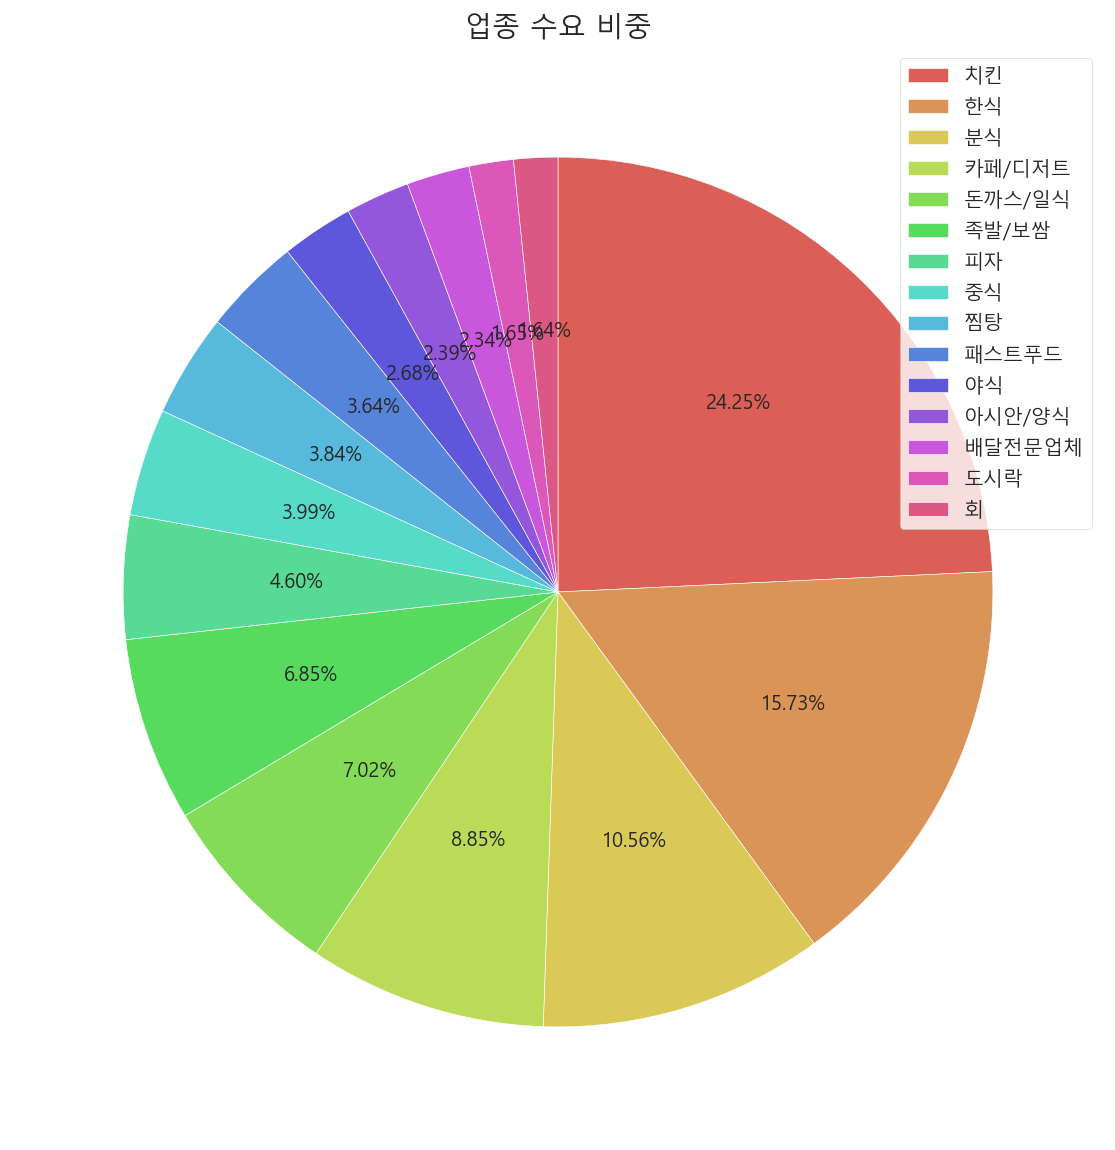

In [530]:
colors = sns.color_palette('hls',len(data_order_count)) 

fig = plt.figure(figsize=(10, 10)) 
fig.set_facecolor('white') 
ax = fig.add_subplot() 
 
pie = ax.pie(data_order_count['비중'], ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), 
       colors = colors
       )
plt.title('업종 수요 비중', fontsize=14)
plt.legend(pie[0],data_order_count['배달상점업종명']) 

* 배달 비중이 적은 업종은 제거 예정
* 동네별로 어떤 업종의 상점들이 있는지 확인

* **주문건수 상위 7개 업종: 치킨(24.25%), 한식 (15.73%), 분식 (10.56%), 카페/디저트 (8.85%), 돈까스/일식(7.02%), 족발/보쌈(6.85%), 피자(4.60%)**

### 동네별 상위 3개 업종 가게(가게 수)

In [502]:
data_where2.sort_values(by='All', ascending=False).head(10)

배달상점업종명,배달상점_읍면동,도시락,돈까스/일식,배달전문업체,분식,아시안/양식,야식,족발/보쌈,중식,찜탕,치킨,카페/디저트,패스트푸드,피자,한식,회,All
18,All,30,67,31,130,32,95,96,74,71,329,159,40,61,259,41,1515
9,심곡동,5,2,7,20,5,39,18,14,13,63,30,13,20,48,16,313
16,중동,9,17,8,39,21,7,19,10,16,47,14,3,4,52,10,276
14,옥길동,6,10,2,8,3,11,3,8,8,26,32,6,5,21,9,158
5,상동,4,11,1,9,0,6,18,8,8,33,7,2,6,36,2,151
15,원미동,5,5,0,11,0,7,3,6,8,45,12,0,5,24,0,131
0,괴안동,0,8,0,15,0,1,4,0,1,36,9,5,15,12,0,106
7,소사본동,0,0,1,8,2,4,2,9,12,11,15,0,3,4,0,71
12,역곡동,0,3,0,0,1,3,5,5,3,18,4,0,0,10,0,52
10,심곡본동,0,1,1,2,0,6,1,9,0,10,7,0,0,11,2,50


In [503]:
# for i in data_where.columns[1:-1]:
#     print(f"{i} 상위 3개 지역: \n{data_where.sort_values(by=i, ascending=False).head(4)['배달상점_읍면동'][1:].values}",
#          end='\n\n')

In [504]:
data_where_T = data_where2.set_index('배달상점_읍면동').T
data_where_T

배달상점_읍면동,괴안동,내동,도당동,범박동,삼정동,상동,소사동,소사본동,송내동,심곡동,심곡본동,약대동,역곡동,오정동,옥길동,원미동,중동,춘의동,All
배달상점업종명,,,,,,,,,,,,,,,,,,,
도시락,0,0,0,1,0,4,0,0,0,5,0,0,0,0,6,5,9,0,30
돈까스/일식,8,0,0,0,0,11,0,0,1,2,1,9,3,0,10,5,17,0,67
배달전문업체,0,0,0,0,11,1,0,1,0,7,1,0,0,0,2,0,8,0,31
분식,15,0,0,6,0,9,2,8,3,20,2,5,0,2,8,11,39,0,130
아시안/양식,0,0,0,0,0,0,0,2,0,5,0,0,1,0,3,0,21,0,32
야식,1,0,1,0,0,6,8,4,2,39,6,0,3,0,11,7,7,0,95
족발/보쌈,4,4,3,2,0,18,0,2,4,18,1,0,5,0,3,3,19,10,96
중식,0,0,4,0,0,8,0,9,1,14,9,0,5,0,8,6,10,0,74
찜탕,1,0,1,0,0,8,1,12,0,13,0,0,3,0,8,8,16,0,71


* 배달상점이 적고, 주문건수도 적은 동네는 음식점 개업을 하기에 좋은 조건이 아니라고 판단하여 1차 제거

* 내동: 주문건수 6172건, 배달상점 4곳
* 오정동: 주문건수 1464건, 배달상점 2곳 <br>
**-->제거**

In [510]:
data_where2.head(3)

배달상점업종명,배달상점_읍면동,도시락,돈까스/일식,배달전문업체,분식,아시안/양식,야식,족발/보쌈,중식,찜탕,치킨,카페/디저트,패스트푸드,피자,한식,회,All
0,괴안동,0,8,0,15,0,1,4,0,1,36,9,5,15,12,0,106
1,내동,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,4
2,도당동,0,0,0,0,0,1,3,4,1,0,0,0,0,16,2,27


In [511]:
data_where2 = data_where2.loc[(data_where2['배달상점_읍면동']!='내동') & (data_where2['배달상점_읍면동']!='오정동')]
data_where2.head(2)

배달상점업종명,배달상점_읍면동,도시락,돈까스/일식,배달전문업체,분식,아시안/양식,야식,족발/보쌈,중식,찜탕,치킨,카페/디저트,패스트푸드,피자,한식,회,All
0,괴안동,0,8,0,15,0,1,4,0,1,36,9,5,15,12,0,106
2,도당동,0,0,0,0,0,1,3,4,1,0,0,0,0,16,2,27


In [514]:
data_where_T.drop(columns=['내동', '오정동'], inplace=True)
data_where_T

배달상점_읍면동,괴안동,도당동,범박동,삼정동,상동,소사동,소사본동,송내동,심곡동,심곡본동,약대동,역곡동,옥길동,원미동,중동,춘의동,All
배달상점업종명,,,,,,,,,,,,,,,,,
도시락,0,0,1,0,4,0,0,0,5,0,0,0,6,5,9,0,30
돈까스/일식,8,0,0,0,11,0,0,1,2,1,9,3,10,5,17,0,67
배달전문업체,0,0,0,11,1,0,1,0,7,1,0,0,2,0,8,0,31
분식,15,0,6,0,9,2,8,3,20,2,5,0,8,11,39,0,130
아시안/양식,0,0,0,0,0,0,2,0,5,0,0,1,3,0,21,0,32
야식,1,1,0,0,6,8,4,2,39,6,0,3,11,7,7,0,95
족발/보쌈,4,3,2,0,18,0,2,4,18,1,0,5,3,3,19,10,96
중식,0,4,0,0,8,0,9,1,14,9,0,5,8,6,10,0,74
찜탕,1,1,0,0,8,1,12,0,13,0,0,3,8,8,16,0,71


In [515]:
# 동네별 배달상점 많은 업종 상위 3개

for i in data_where_T.columns[:-1]:
    print(f"{i} 상위 3개 업종: \n{data_where_T.sort_values(by=i, ascending=False).head(4).index[1:].tolist()}",
         end='\n\n')

괴안동 상위 3개 업종: 
['치킨', '분식', '피자']

도당동 상위 3개 업종: 
['한식', '중식', '족발/보쌈']

범박동 상위 3개 업종: 
['카페/디저트', '분식', '치킨']

삼정동 상위 3개 업종: 
['한식', '배달전문업체', '패스트푸드']

상동 상위 3개 업종: 
['한식', '치킨', '족발/보쌈']

소사동 상위 3개 업종: 
['야식', '치킨', '분식']

소사본동 상위 3개 업종: 
['카페/디저트', '찜탕', '치킨']

송내동 상위 3개 업종: 
['치킨', '카페/디저트', '한식']

심곡동 상위 3개 업종: 
['치킨', '한식', '야식']

심곡본동 상위 3개 업종: 
['한식', '치킨', '중식']

약대동 상위 3개 업종: 
['치킨', '카페/디저트', '돈까스/일식']

역곡동 상위 3개 업종: 
['치킨', '한식', '족발/보쌈']

옥길동 상위 3개 업종: 
['카페/디저트', '치킨', '한식']

원미동 상위 3개 업종: 
['치킨', '한식', '카페/디저트']

중동 상위 3개 업종: 
['한식', '치킨', '분식']

춘의동 상위 3개 업종: 
['족발/보쌈', '치킨', '도시락']



### 매출 관련
가장 포화된 업종과 가장 매출이 적은 배달 금액이 적은 업종 - 지역 내 매장 수가 가장 많은 업종과, 평균 매출이 가장 적은 업종
<br>(업종 수로 배달매출을 나눠 평균값 구한 뒤 업종 당 평균 매출 시각화)<br>
매장별 평균 매출

In [531]:
data.head(2)

,순번,처리일,배달요청업체id,배달요청상태,배달접수회사id,배달상점id,배달상점업종명,배달상점_주소코드,배달상점_시도,배달상점_시군구,배달상점_읍면동,배달상점_행정동코드,배달상점_도로명주소코드,배달목적지_법정동코드,배달목적지_시도,배달목적지_시군구,배달목적지_읍면동,배달목적지_행정동코드,배달목적지_도로명주소코드,배달기사id,배달비용,호출중계수수료금액,배달상품금액,결제종류번호,배달접수시간,배달배차시간,배달수령시간,배달완료시간,배달취소시간
0,130707,2019-07-10,C000077,2,2019-07-10 15:02:34,S0021794,돈까스/일식,4119011500,경기도,부천시,옥길동,4119079500,411904853794,4119011500,경기도,부천시,옥길동,4119079500,411903185011,D0000884,3000,0,19000,3,2019-07-10 14:58:33,2019-07-10 14:59:06,2019-07-10 14:59:30,NaT,2019-07-10 15:02:34
1,131807,2019-07-10,C000077,2,2019-07-10 15:59:01,S0021648,치킨,4119011500,경기도,부천시,옥길동,4119079500,411903185011,4119011500,경기도,부천시,옥길동,4119079500,411904853793,D0000884,3000,0,23000,1,2019-07-10 15:57:08,2019-07-10 15:57:35,2019-07-10 15:57:48,NaT,2019-07-10 15:59:01


#### 업종별 평균 매출

In [540]:
# 업종별 배달상점 개수
data_store = data.pivot_table(index='배달상점업종명', 
                              values='배달상점id',
                              aggfunc=pd.Series.nunique,
                              fill_value=0,
                              margins=True).reset_index()
data_store.rename(columns={'배달상점id':'배달상점개수(unique)'}, inplace=True)
data_store

,배달상점업종명,배달상점개수(unique)
0,도시락,30
1,돈까스/일식,67
2,배달전문업체,31
3,분식,130
4,아시안/양식,32
5,야식,95
6,족발/보쌈,96
7,중식,74
8,찜탕,71
9,치킨,329


**동일업종 평균 매출 = 특정 업종의 배달상품금액 총합 / 배달상점개수(unique value)**
<br>
엄밀하게 따지면, 위의 공식이 평균 매출을 뜻하지는 않지만 편의상 매출로 표현함

In [549]:
# 업종별 상품금액 총합 = data_income_sum
data_income_sum = data.pivot_table(index='배달상점업종명',
                                    values='배달상품금액', 
                                    aggfunc='sum').reset_index()

# data_income_sum과 data_store 병합(merge) 
data_store_income = data_income_sum.merge(data_store, how='inner', on='배달상점업종명')

# 동일업종 평균 매출(배달상품금액 총합/배달상점개수)
data_store_income['평균매출'] = data_store_income['배달상품금액'] / data_store_income['배달상점개수(unique)']
data_store_income = data_store_income.sort_values(by='평균매출', ascending=False)
data_store_income.reset_index(drop=True, inplace=True)
data_store_income

,배달상점업종명,배달상품금액,배달상점개수(unique),평균매출
0,돈까스/일식,1812747569,67,27055933.87
1,족발/보쌈,2208269213,96,23002804.30
2,피자,1101158858,61,18051784.56
3,아시안/양식,561518981,32,17547468.16
4,패스트푸드,678533031,40,16963325.77
5,배달전문업체,519296402,31,16751496.84
6,치킨,5080652018,329,15442711.30
7,찜탕,1032628748,71,14544066.87
8,분식,1836411371,130,14126241.32
9,회,548465443,41,13377205.93


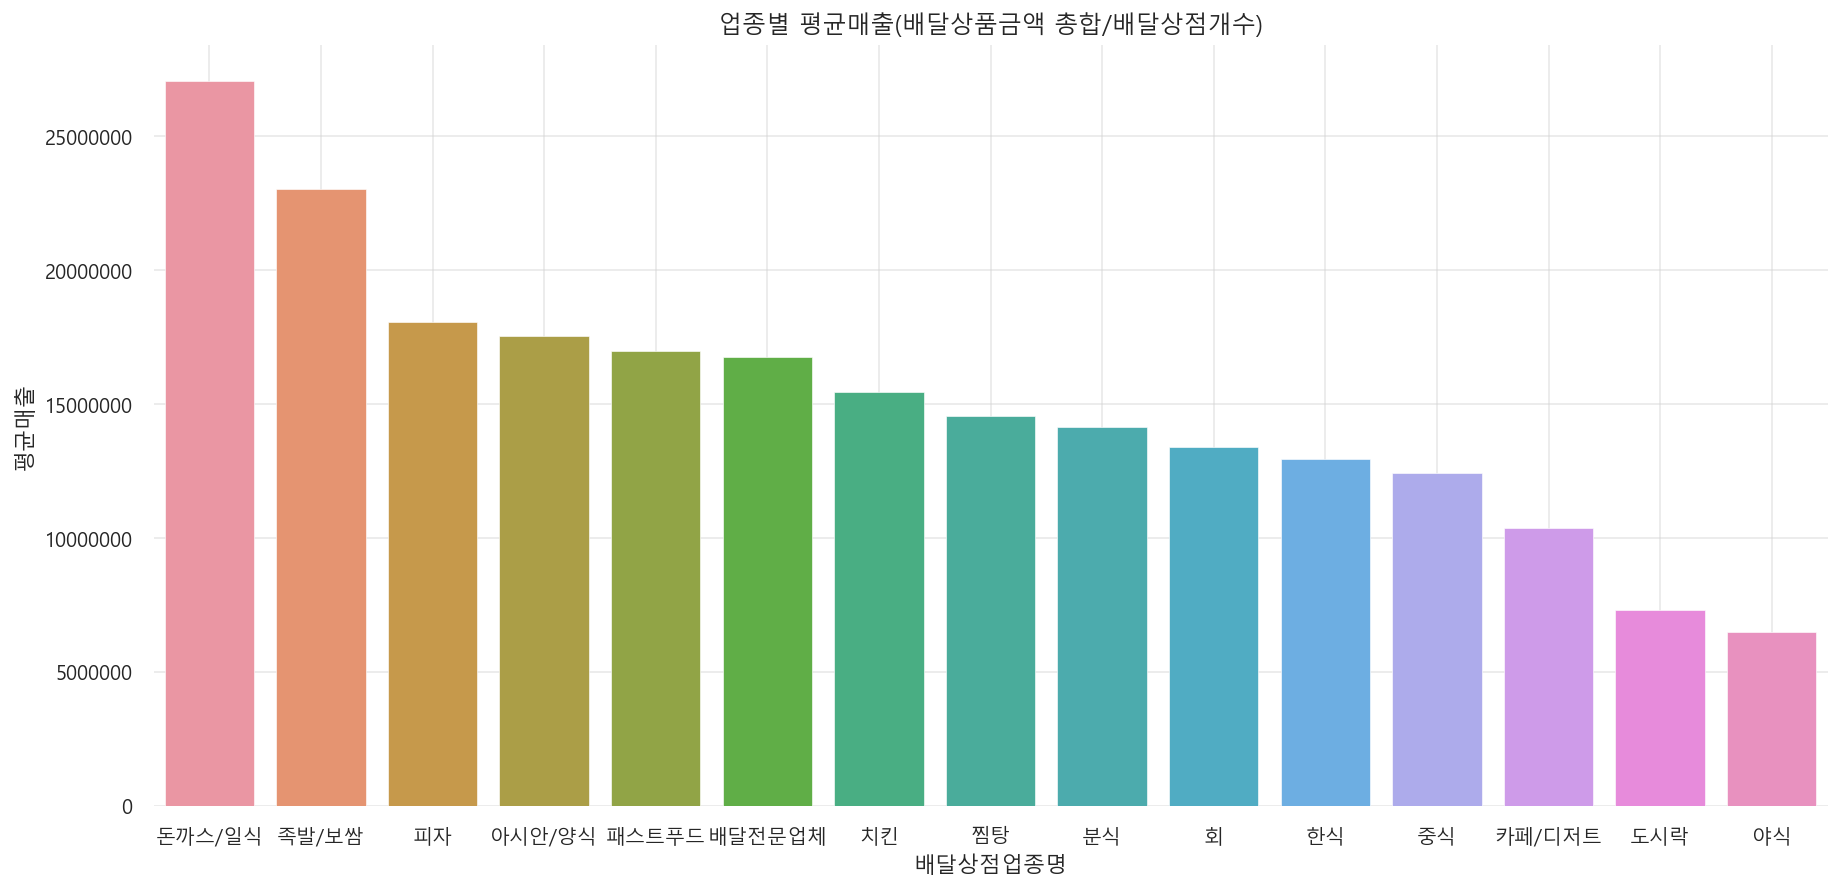

In [555]:
plt.figure(figsize=(15, 7))
ax = sns.barplot(data=data_store_income, x='배달상점업종명', y='평균매출')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('업종별 평균매출(배달상품금액 총합/배달상점개수)')
plt.grid(color='lightgrey', alpha=0.43)

* 주문건수 상위 7개 업종: 치킨(24.25%), 한식 (15.73%), 분식 (10.56%), 카페/디저트 (8.85%), 돈까스/일식(7.02%), 족발/보쌈(6.85%), 피자(4.60%)
* 평균매출 상위 7개 업종: 돈까스/일식, 족발/보쌈, 피자, 아시안/양식, 패스트푸드, 치킨, 찜탕  

#### 동네별 업종별 평균 매출

In [562]:
# 동네별 업종별 배달상점개수
data_store2 = data.pivot_table(index=['배달상점_읍면동', '배달상점업종명'], 
                              values='배달상점id',
                              aggfunc=pd.Series.nunique,
                              fill_value=0,
                              margins=True).reset_index()
data_store2.rename(columns={'배달상점id':'배달상점개수(unique)'}, inplace=True)
data_store2.head()

,배달상점_읍면동,배달상점업종명,배달상점개수(unique)
0,괴안동,돈까스/일식,8
1,괴안동,분식,15
2,괴안동,야식,1
3,괴안동,족발/보쌈,4
4,괴안동,찜탕,1


In [577]:
# 동네별 업종별 상품금액 총합 = data_income_sum2
data_income_sum2 = data.pivot_table(index=['배달상점_읍면동', '배달상점업종명'],
                                    values='배달상품금액', 
                                    aggfunc='sum').reset_index()

# data_income_sum2와 data_store2 병합(merge) 
data_store_income2 = data_income_sum2.merge(data_store2, how='inner', on=['배달상점_읍면동', '배달상점업종명'])

# 동일업종 평균 매출(배달상품금액 총합/배달상점개수)
data_store_income2['평균매출'] = data_store_income2['배달상품금액'] / data_store_income2['배달상점개수(unique)']
data_store_income2 = data_store_income2.sort_values(by='평균매출', ascending=False)
data_store_income2.reset_index(drop=True, inplace=True)
data_store_income2 = data_store_income2.sort_values(by='배달상점_읍면동').reset_index(drop=True)
data_store_income2.head(7)

,배달상점_읍면동,배달상점업종명,배달상품금액,배달상점개수(unique),평균매출
0,괴안동,패스트푸드,136259753,5,27251950.60
1,괴안동,분식,253528506,15,16901900.40
2,괴안동,카페/디저트,69186118,9,7687346.44
3,괴안동,피자,372321903,15,24821460.20
4,괴안동,족발/보쌈,45779500,4,11444875.00
5,괴안동,돈까스/일식,374032490,8,46754061.25
6,괴안동,한식,197491270,12,16457605.83


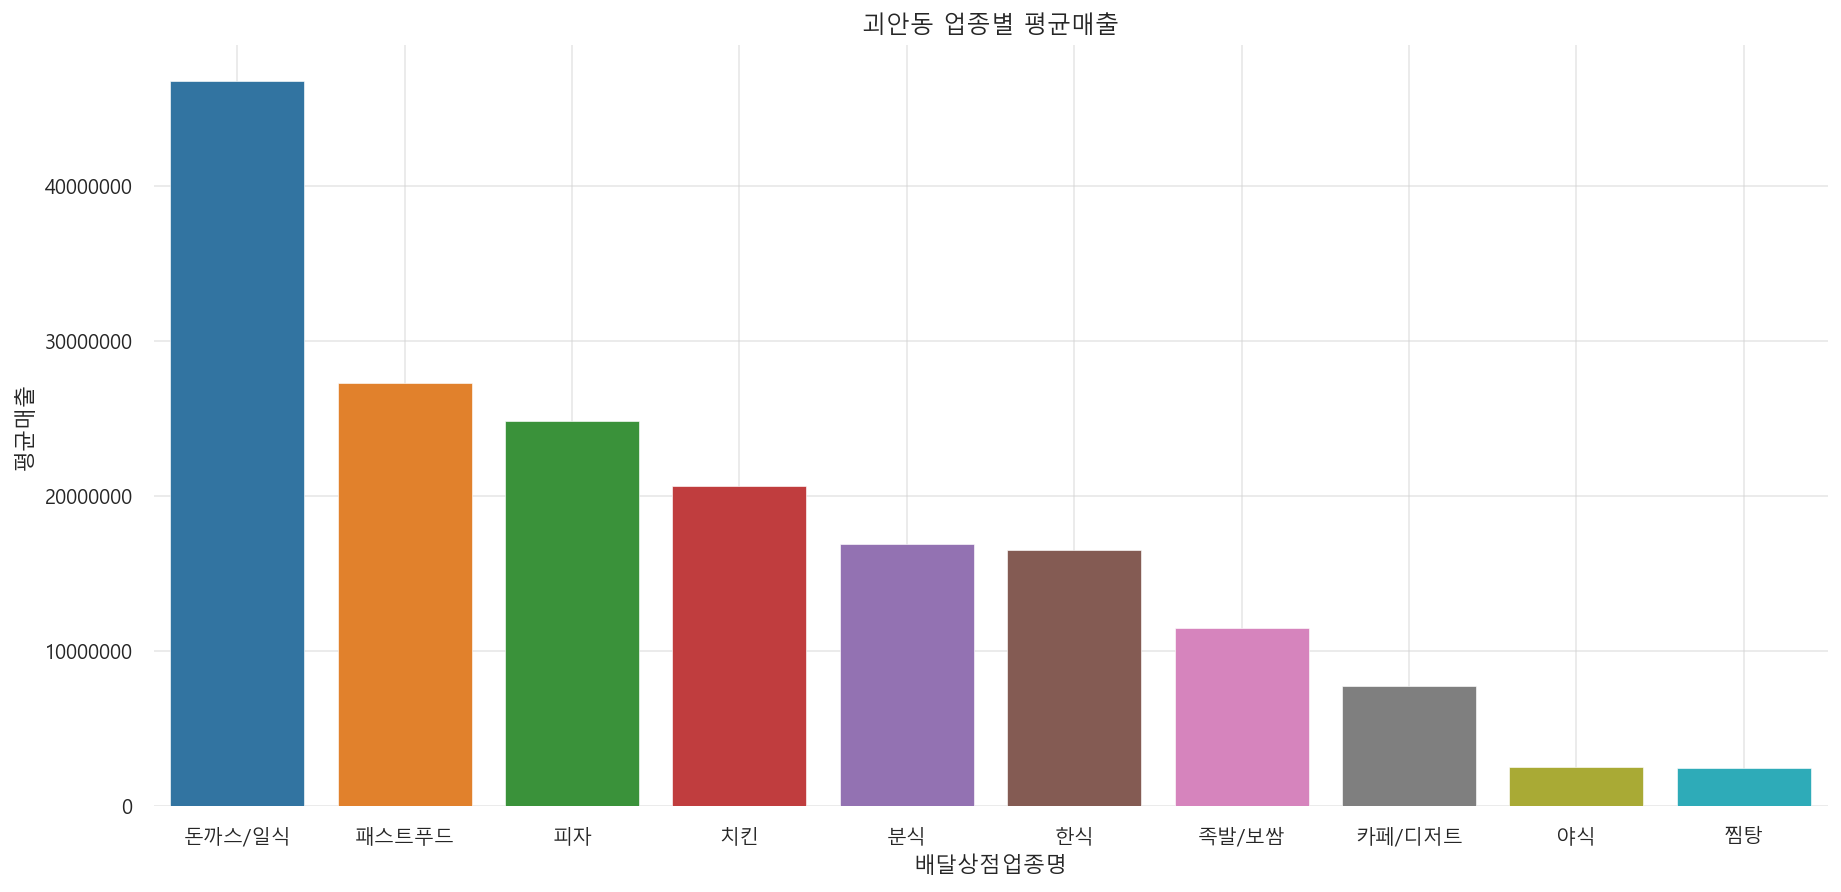

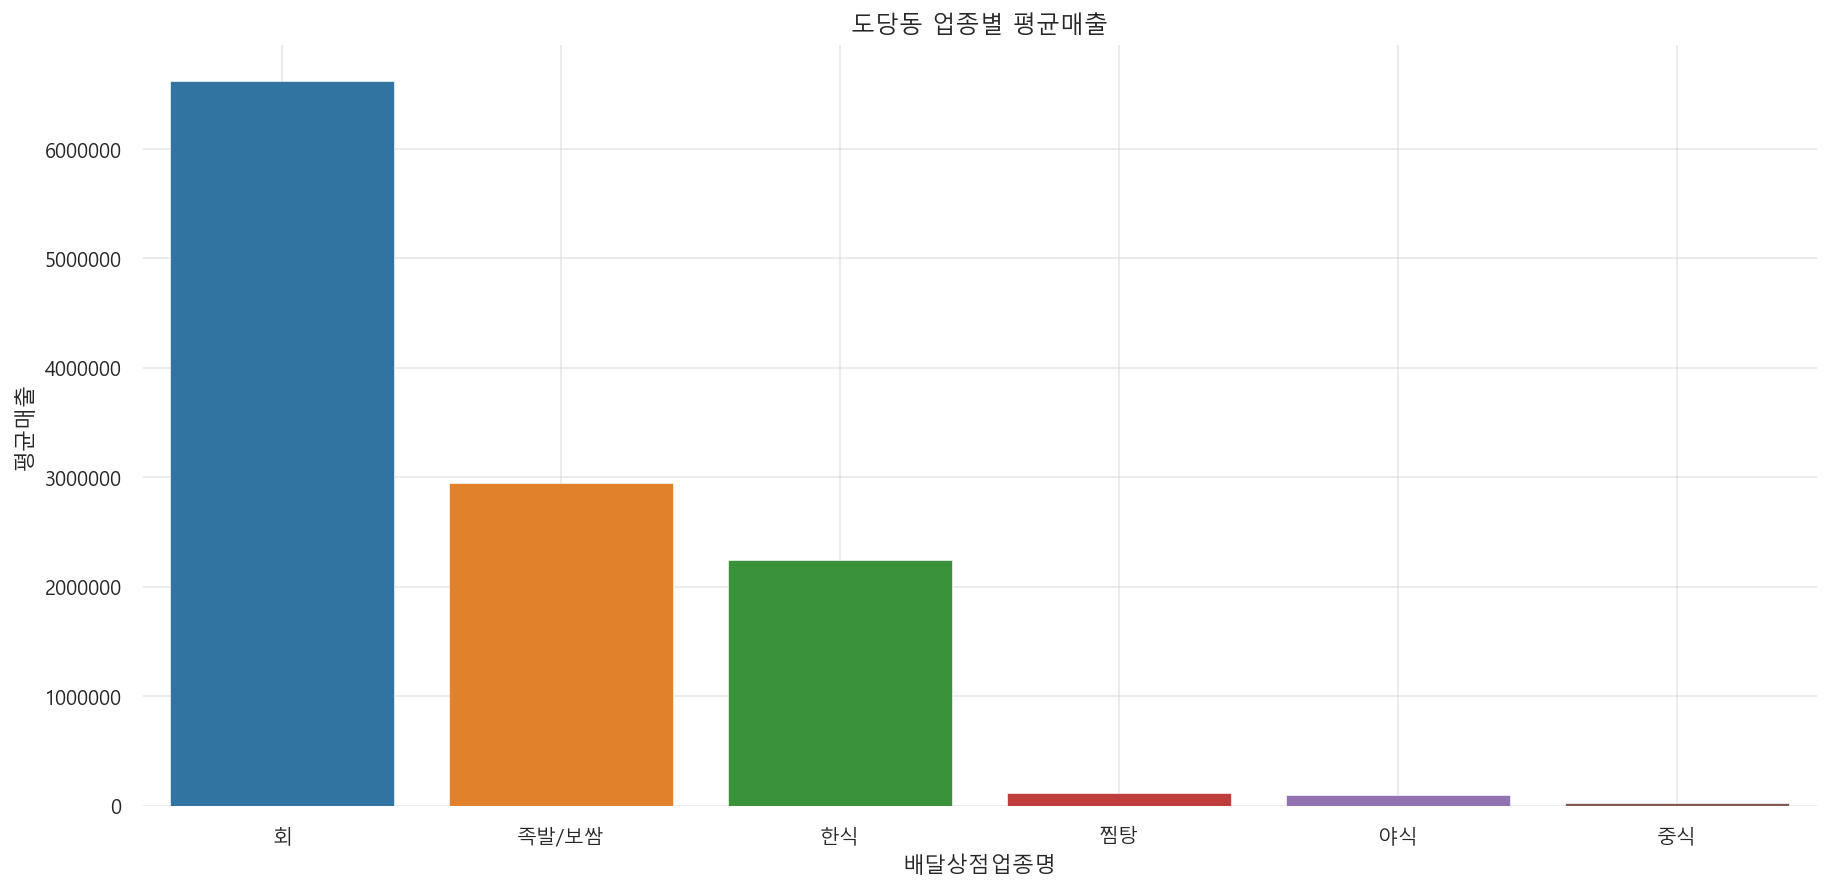

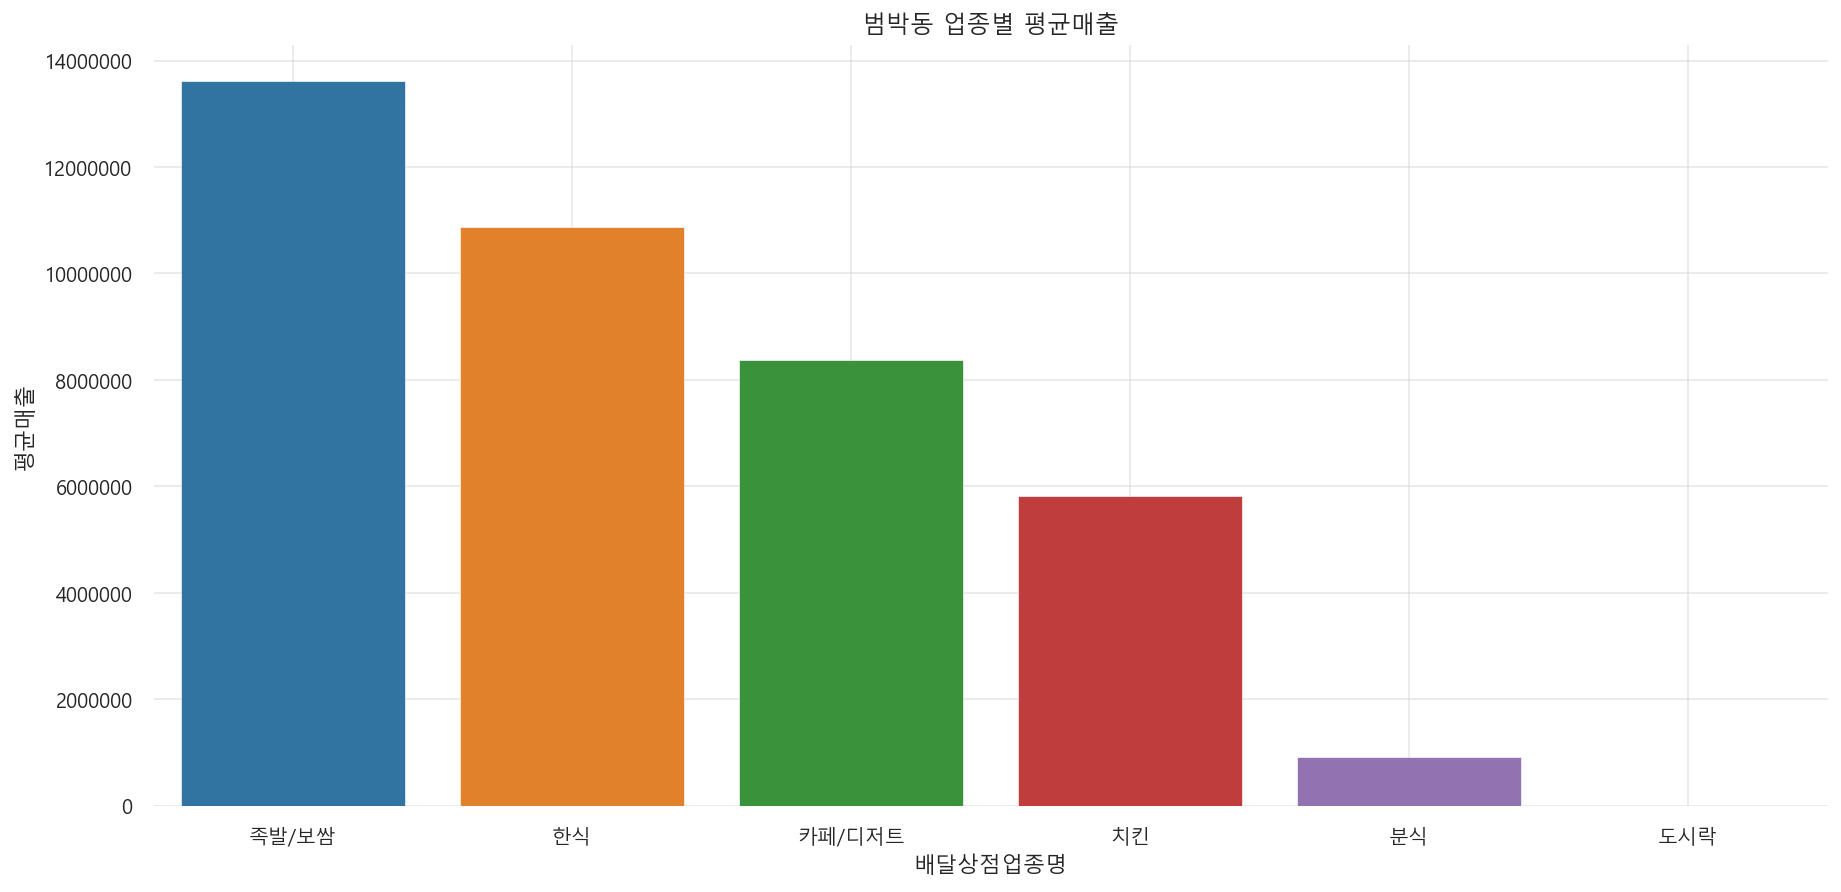

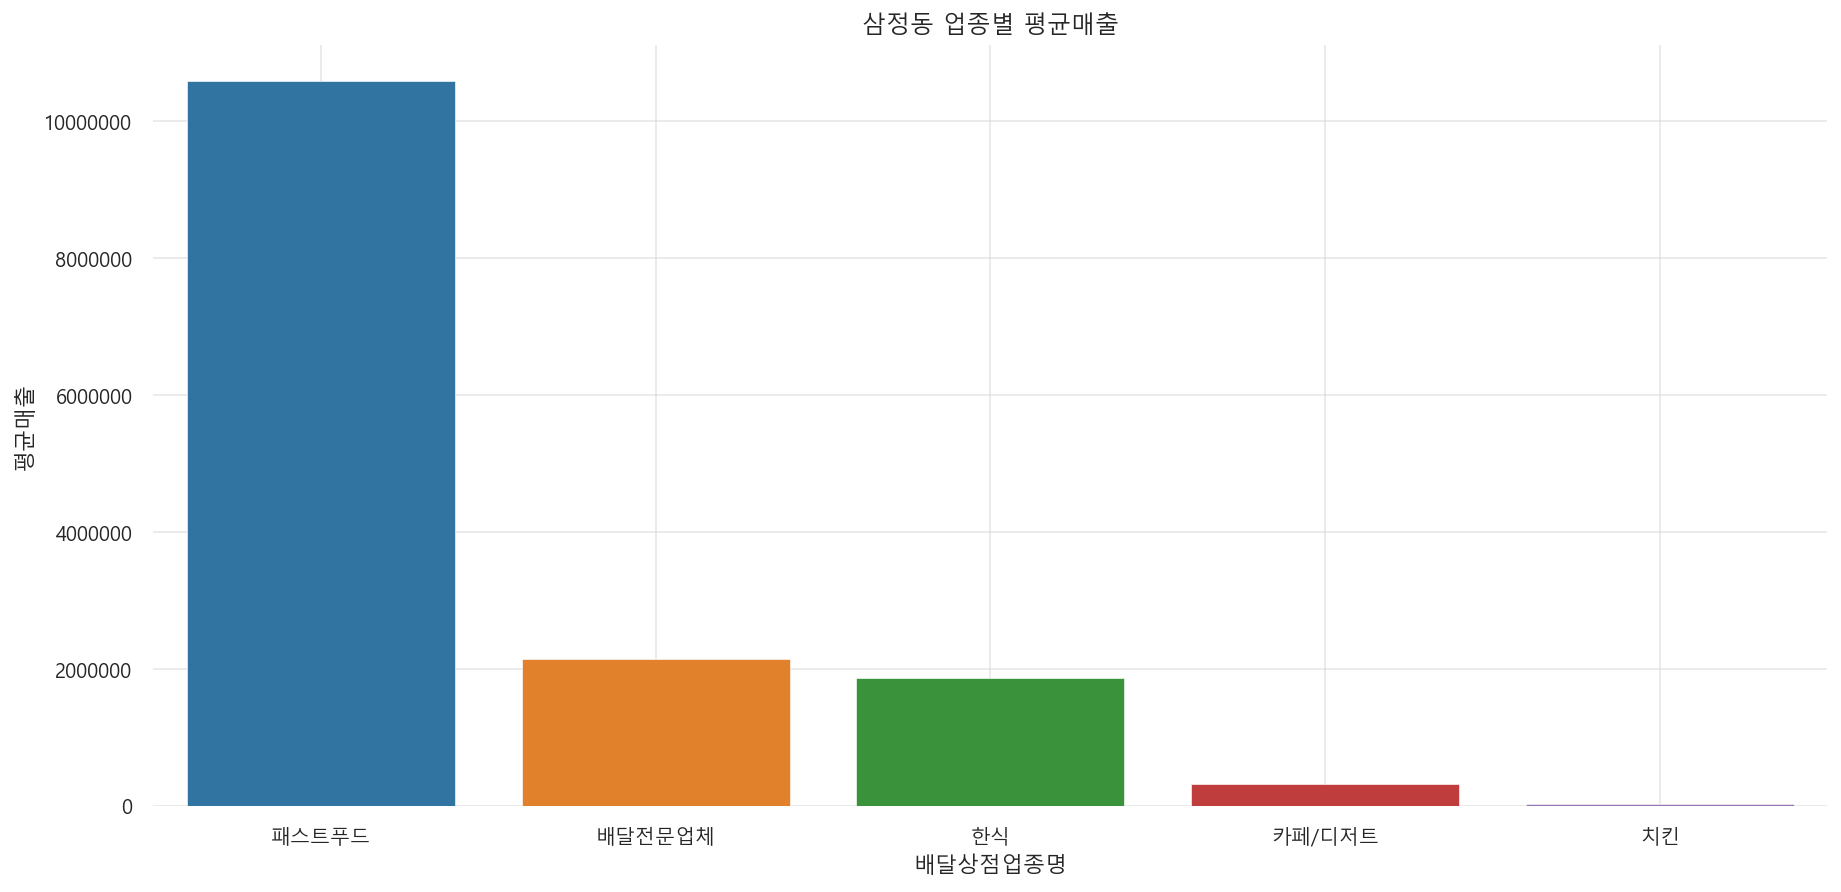

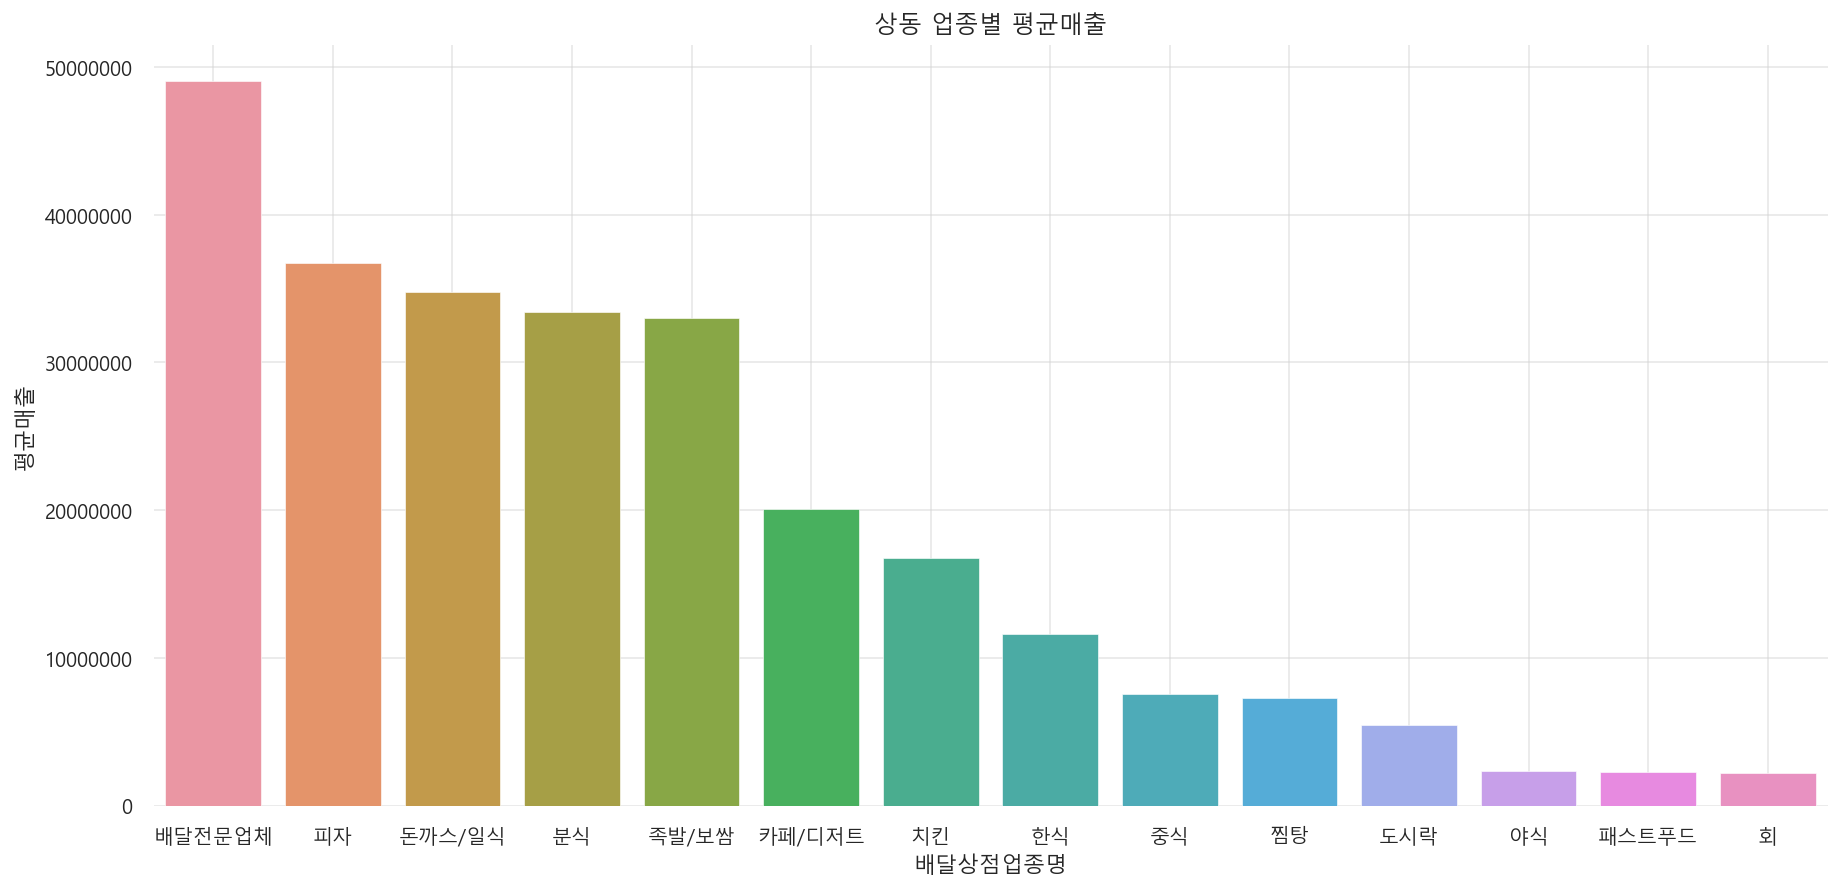

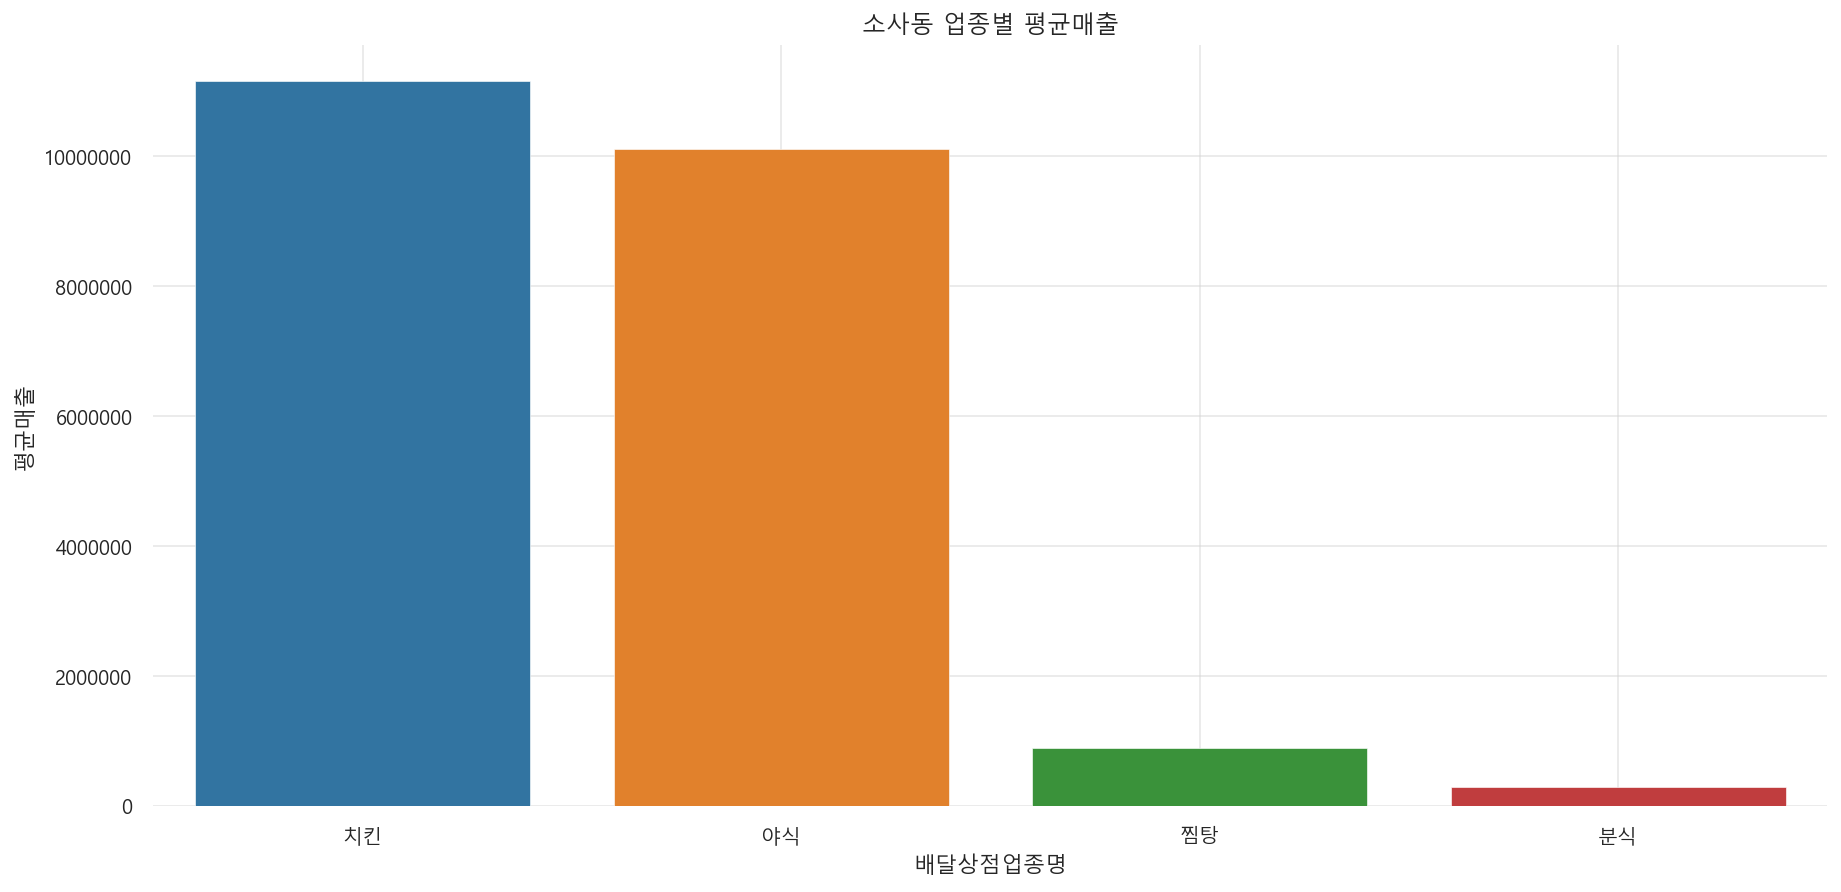

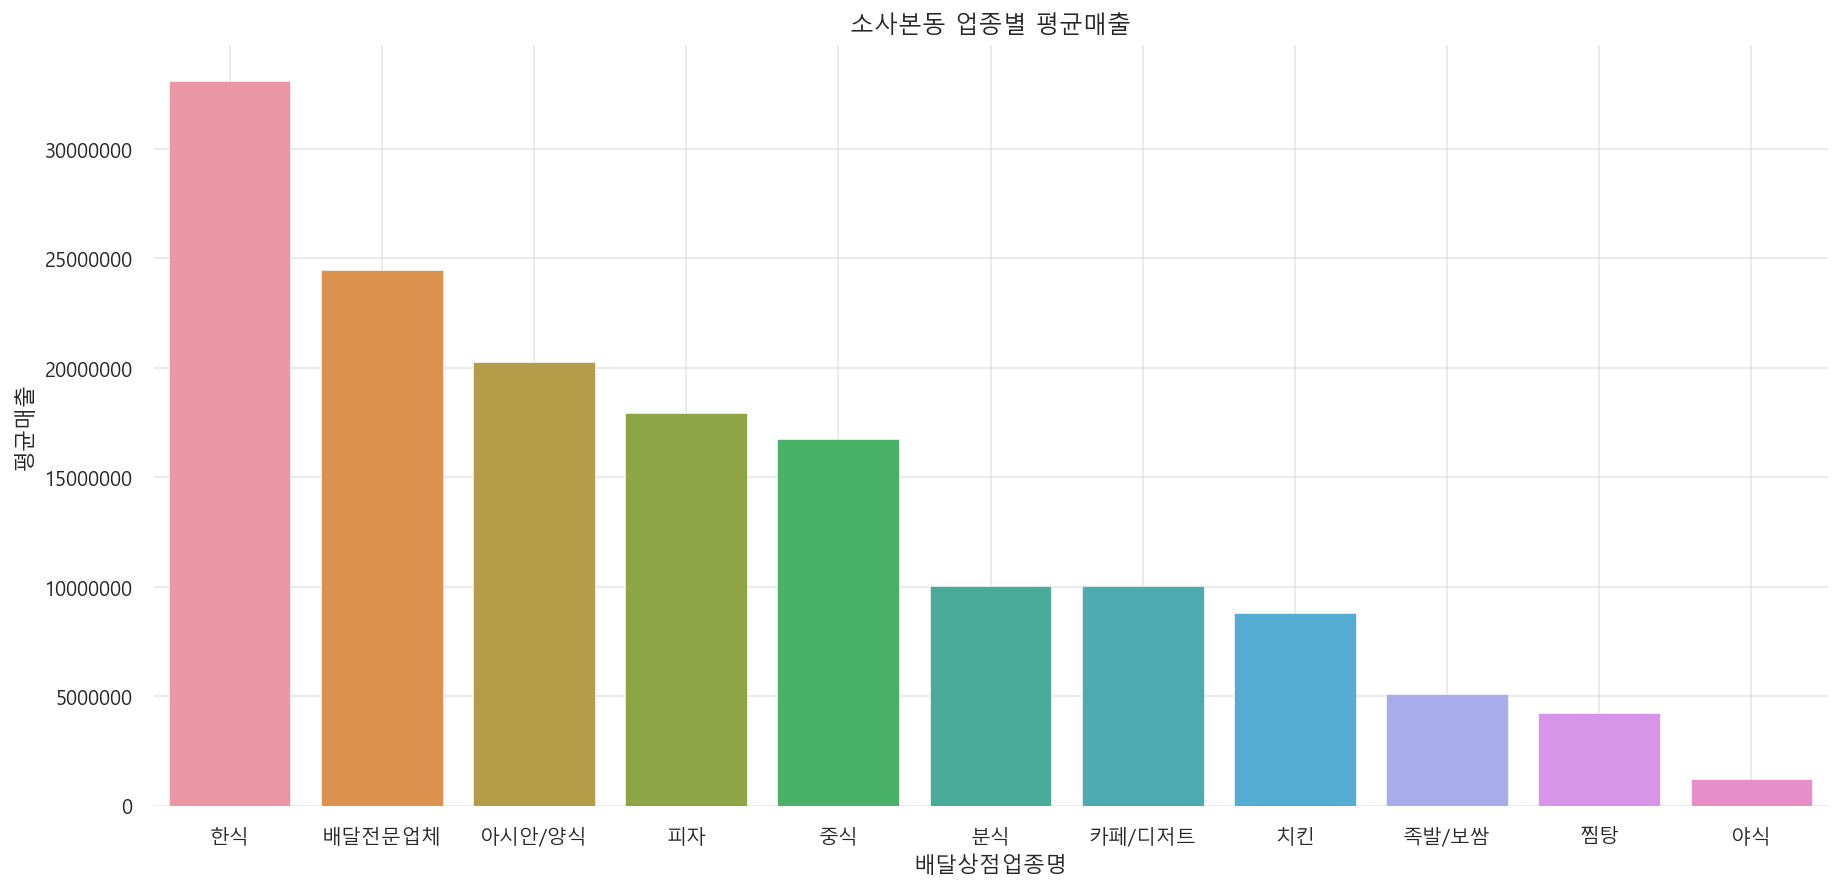

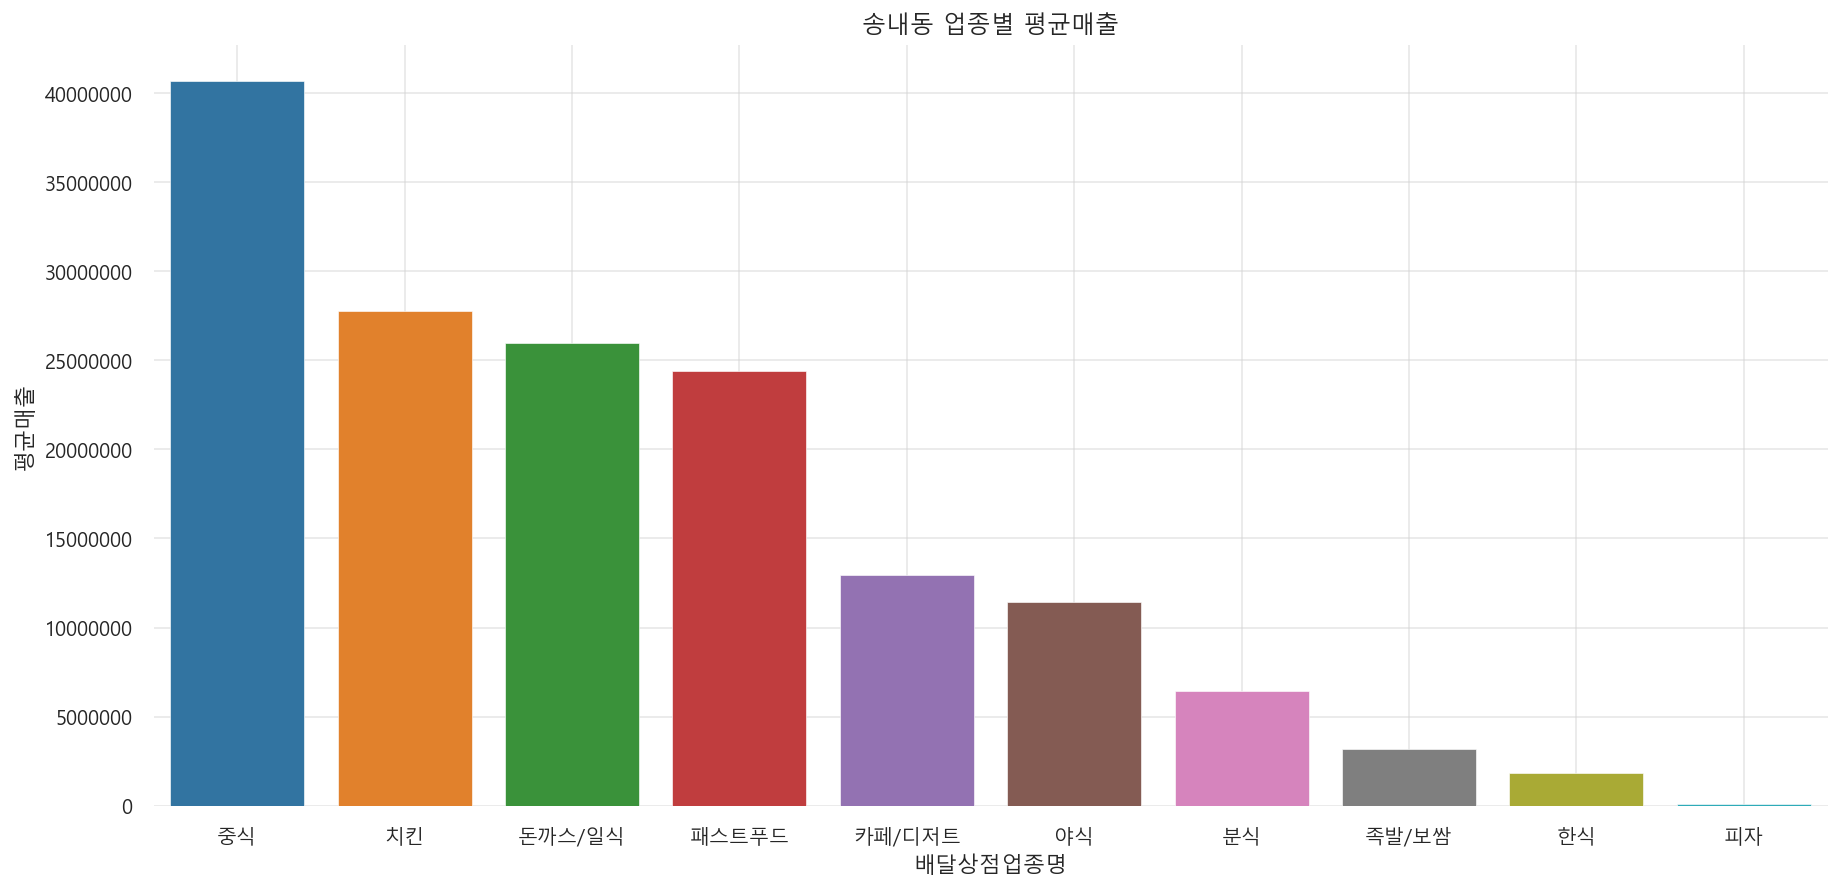

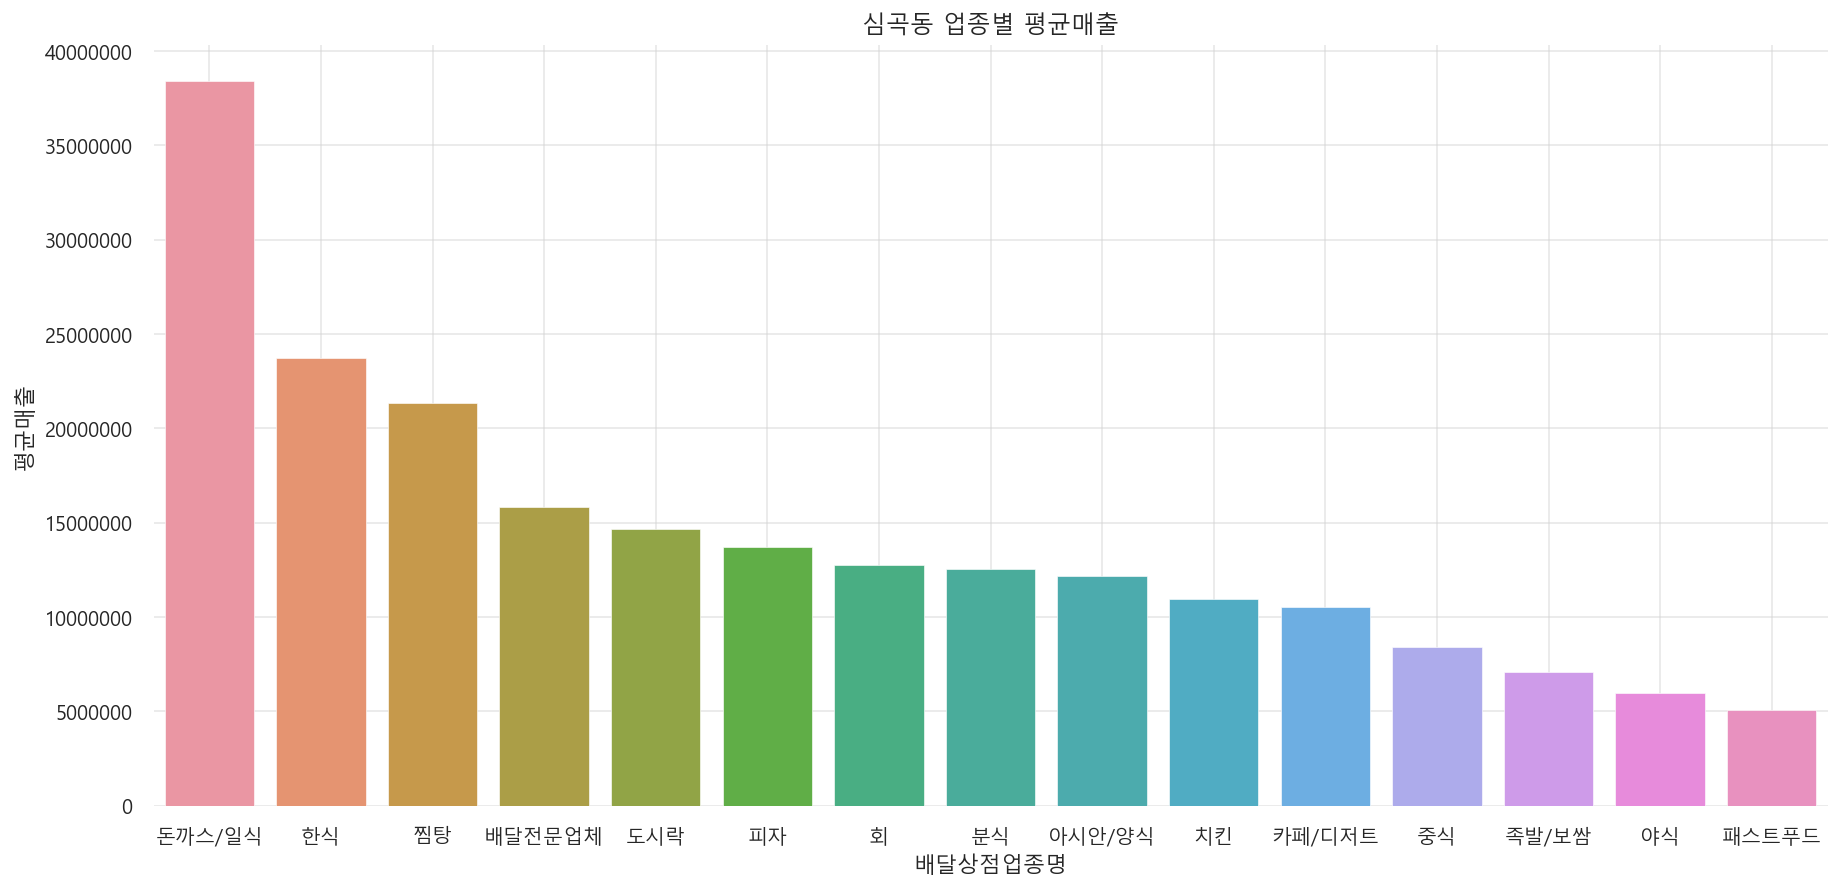

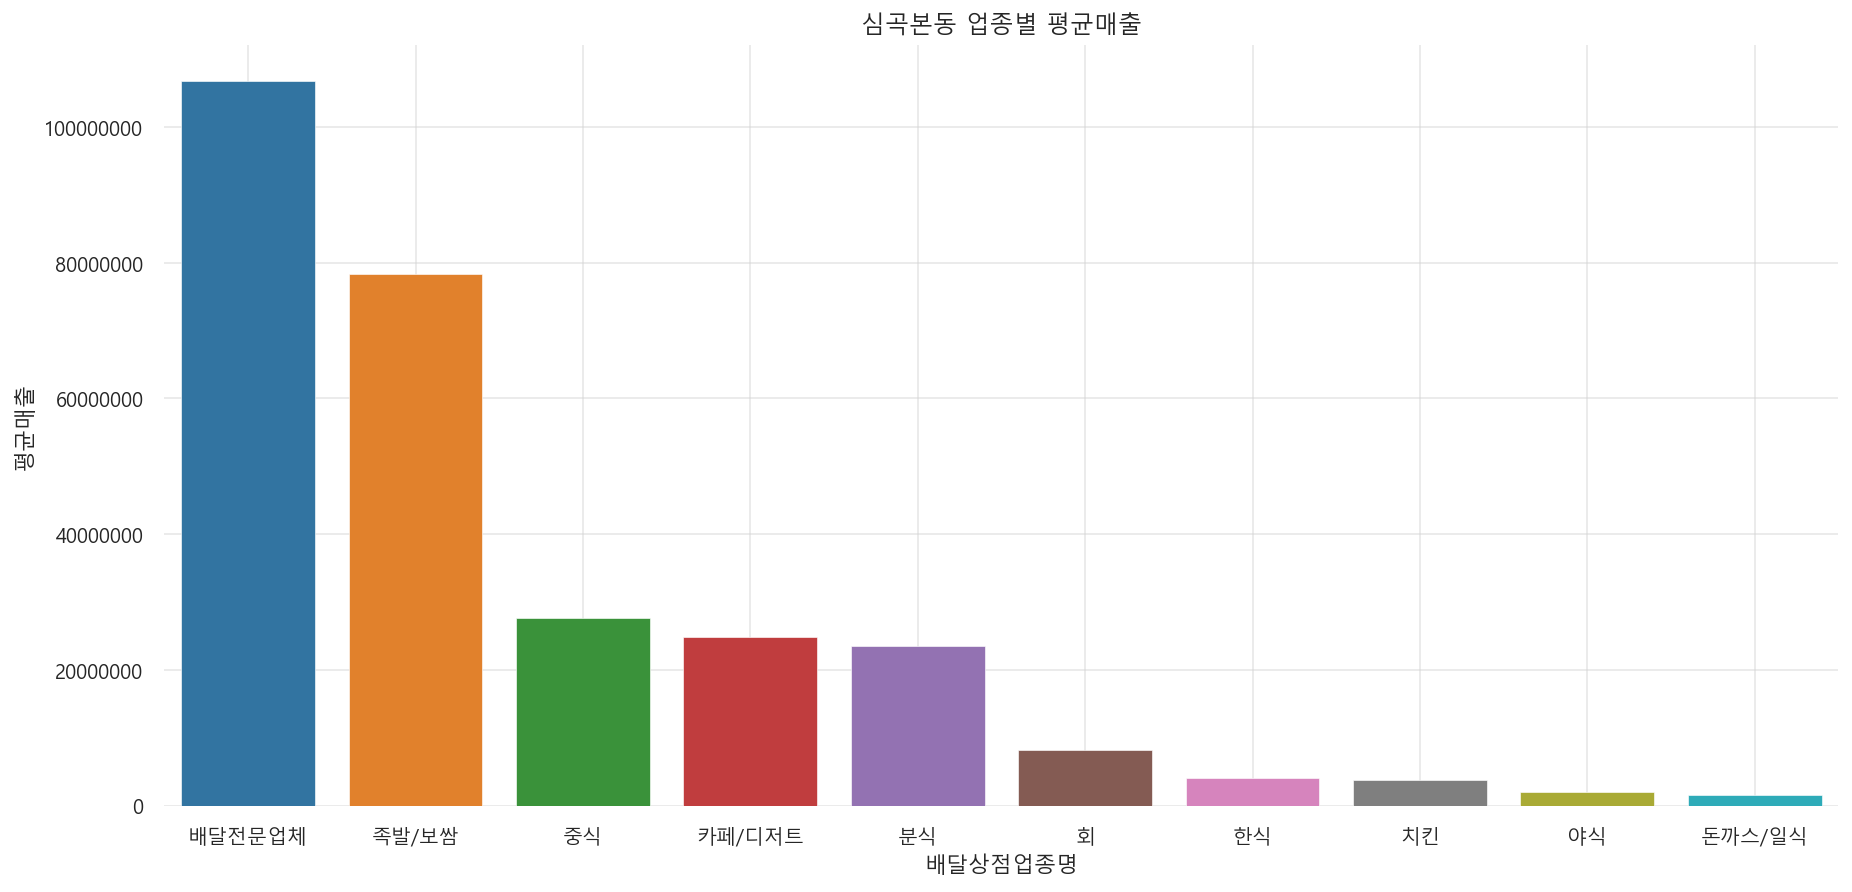

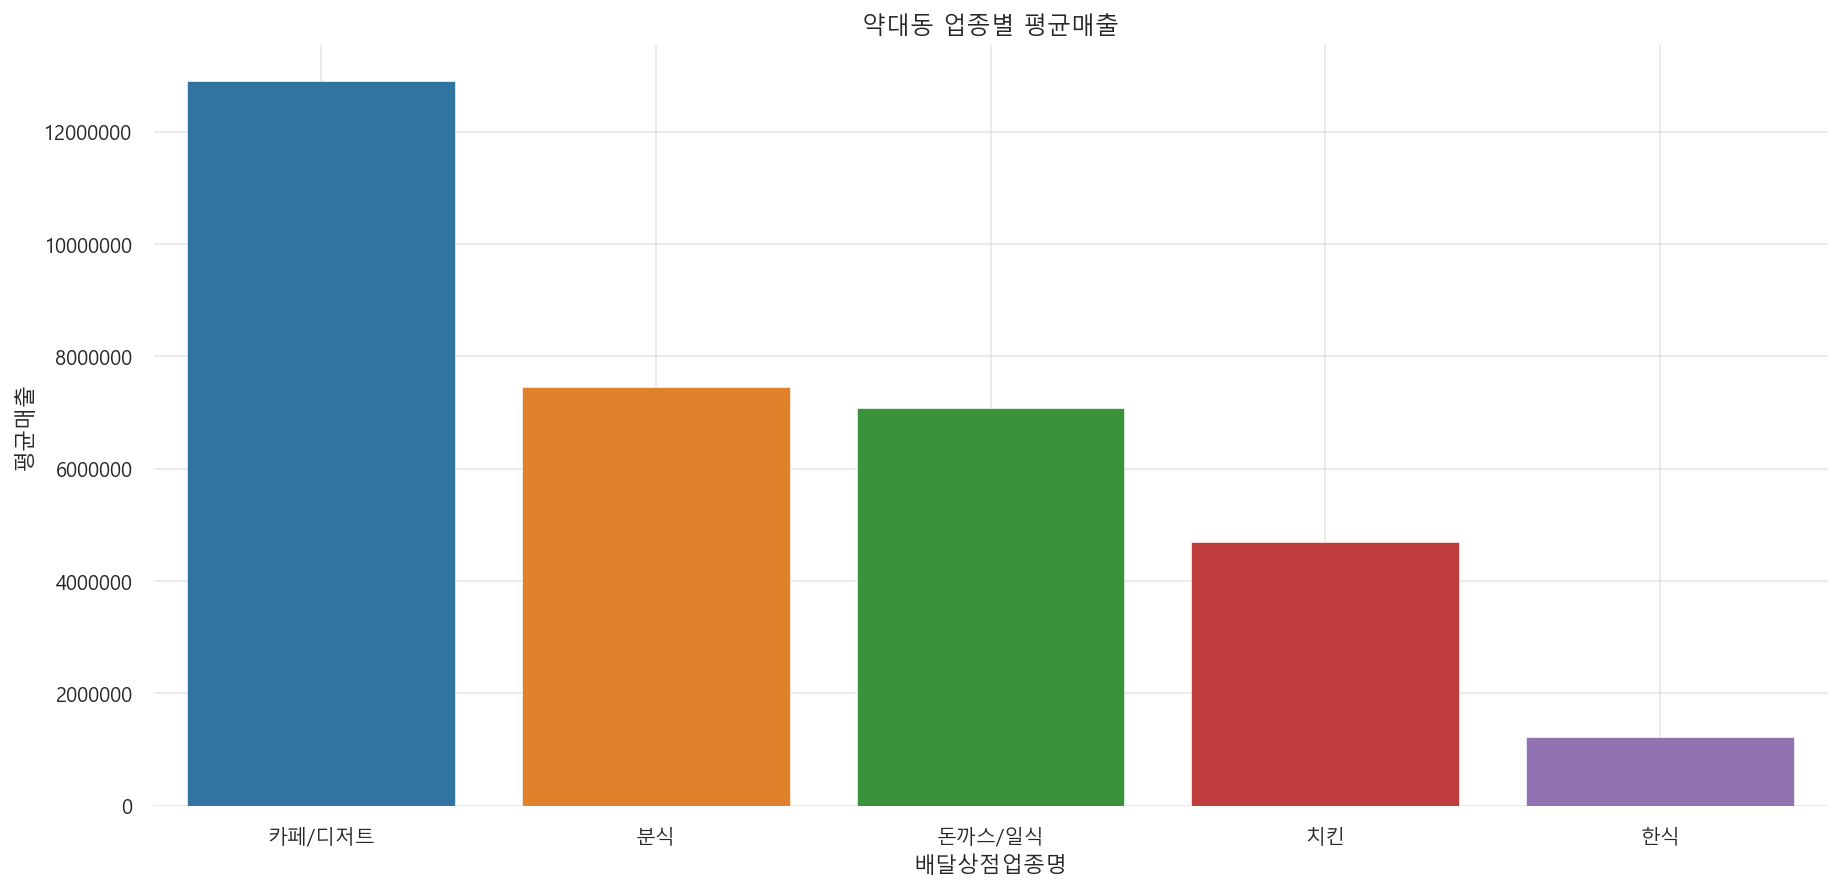

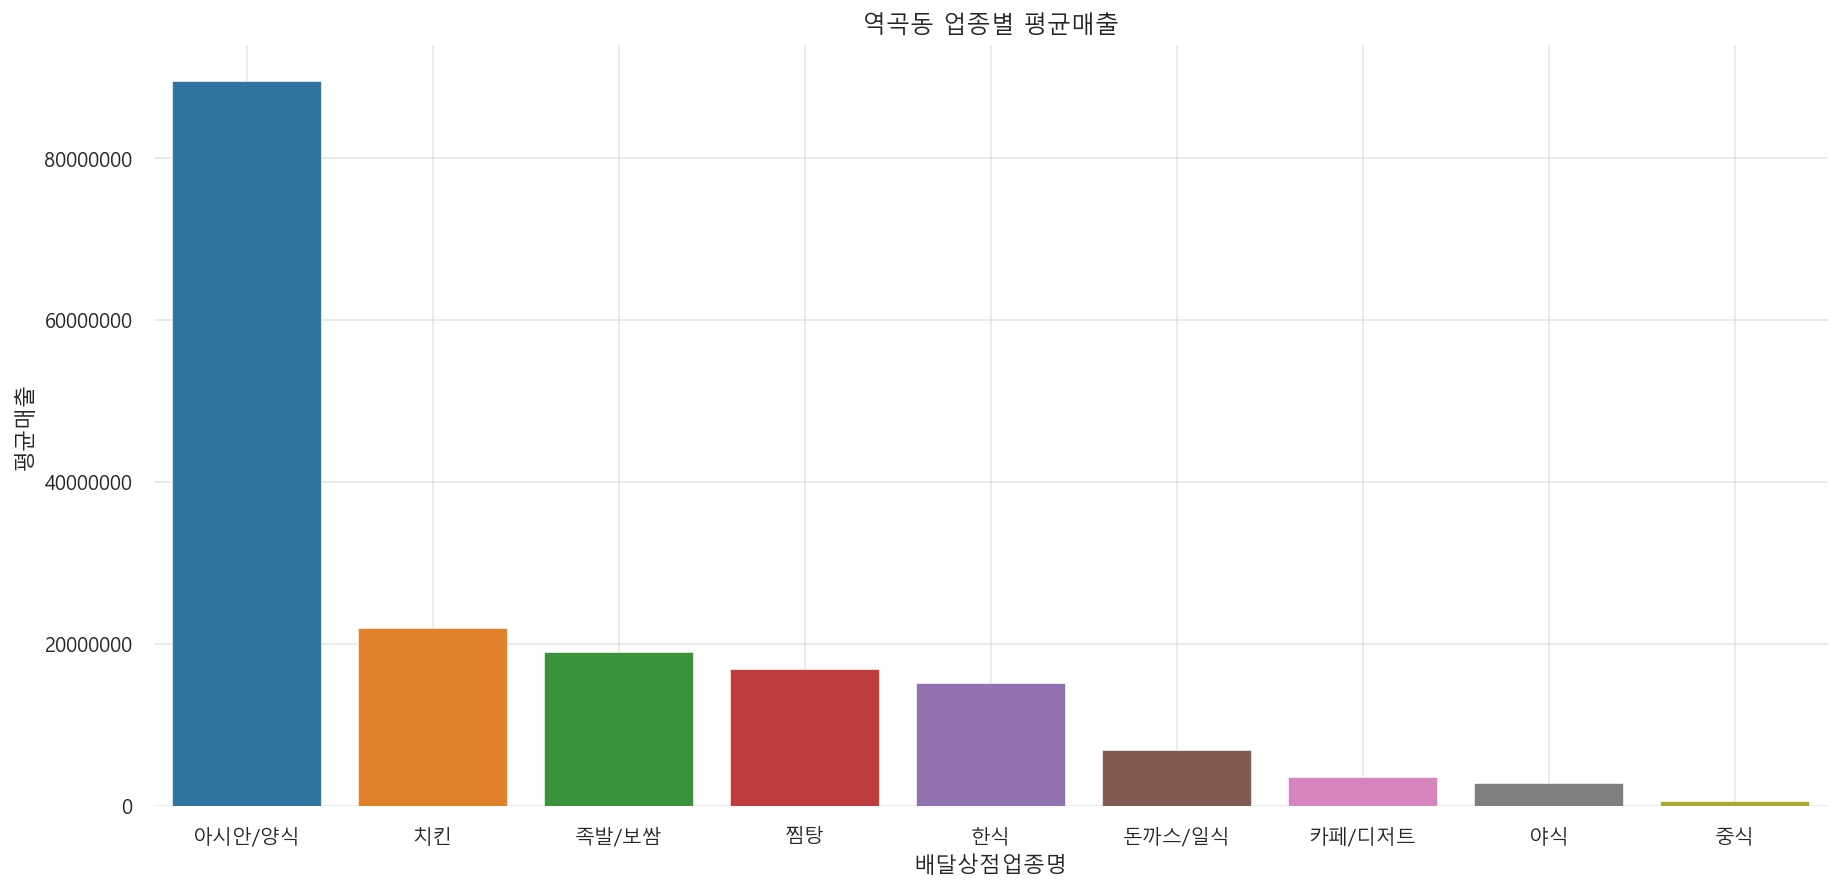

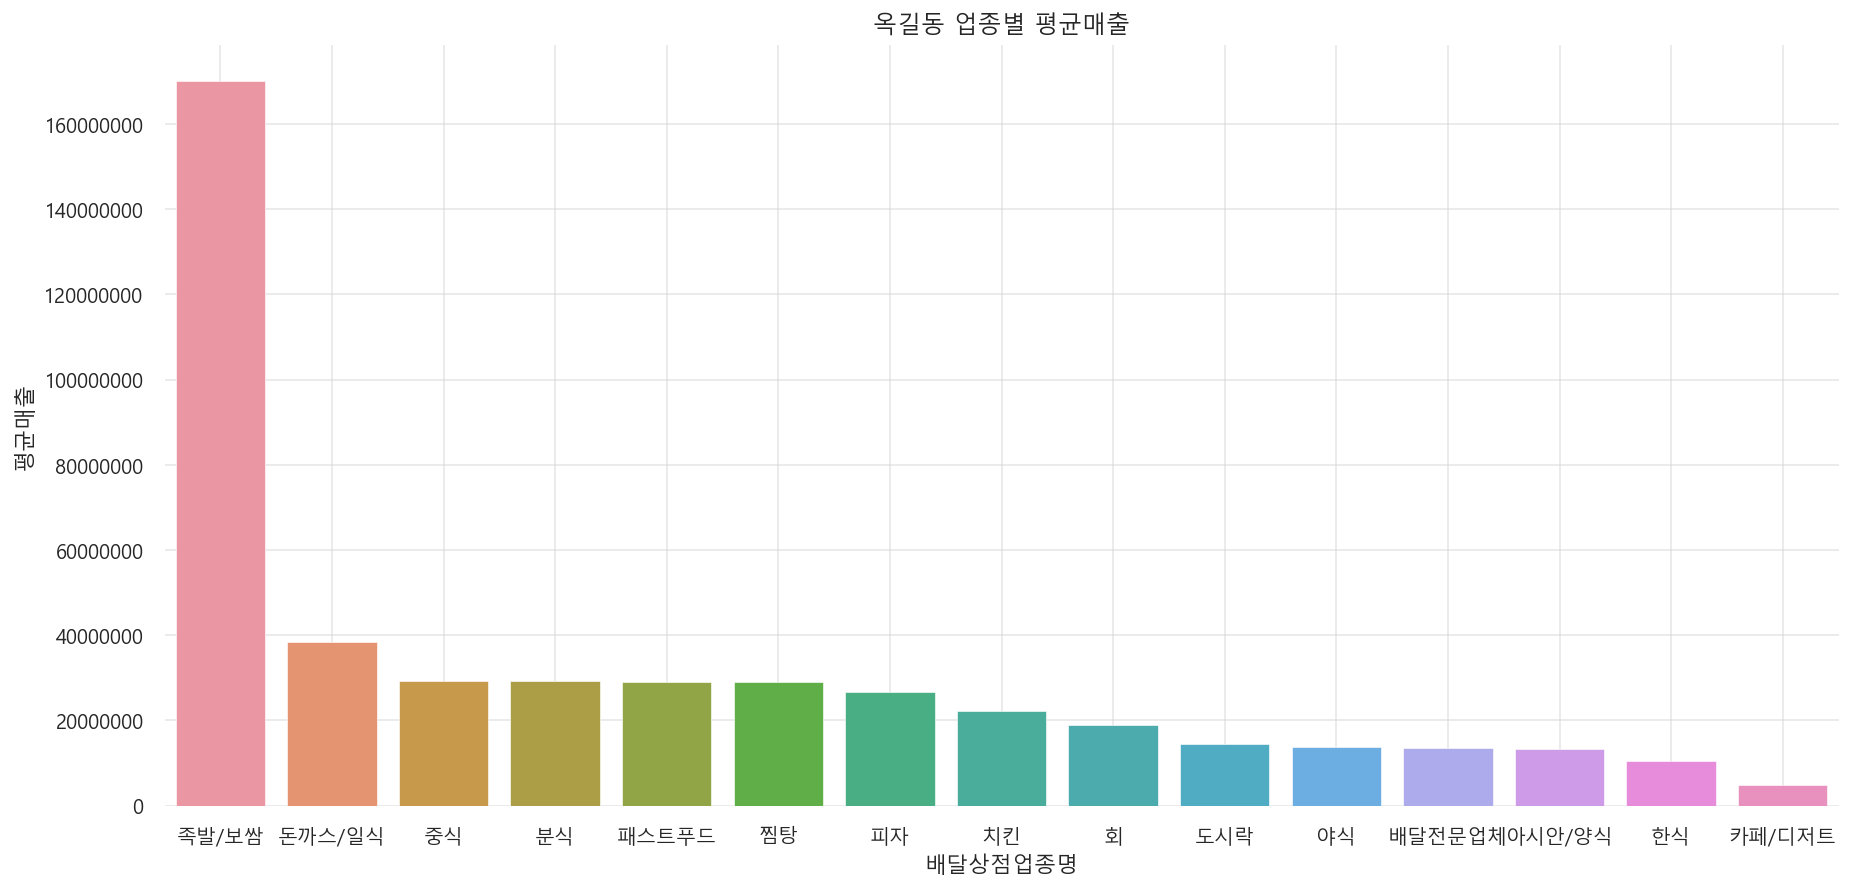

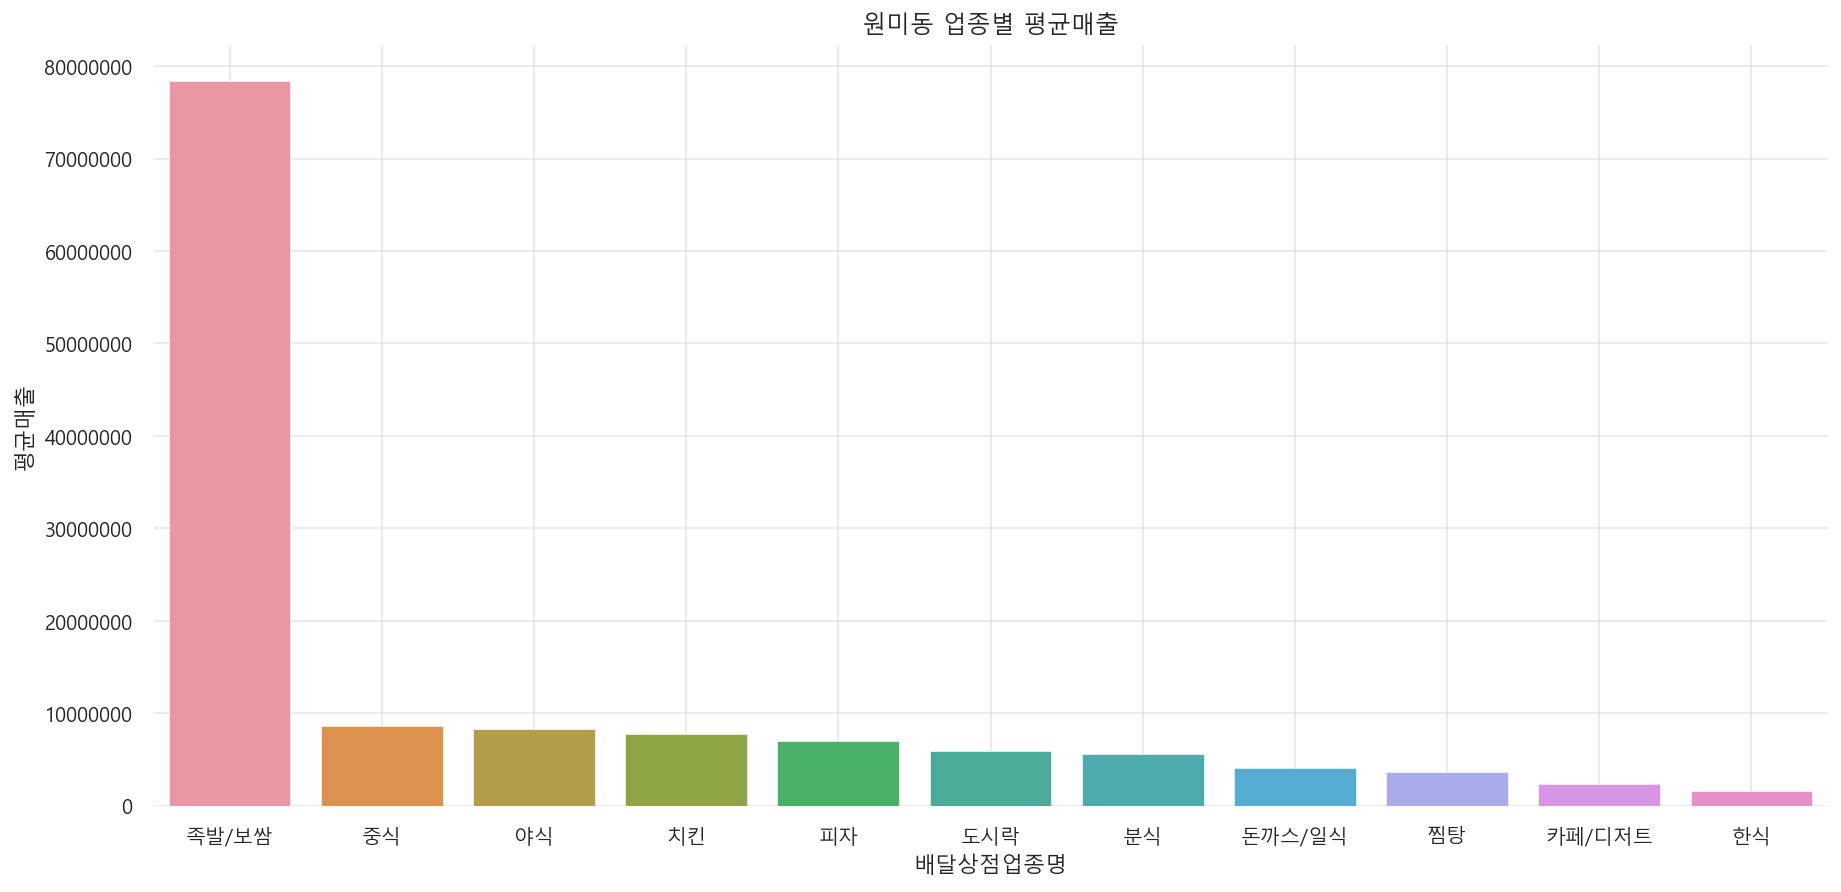

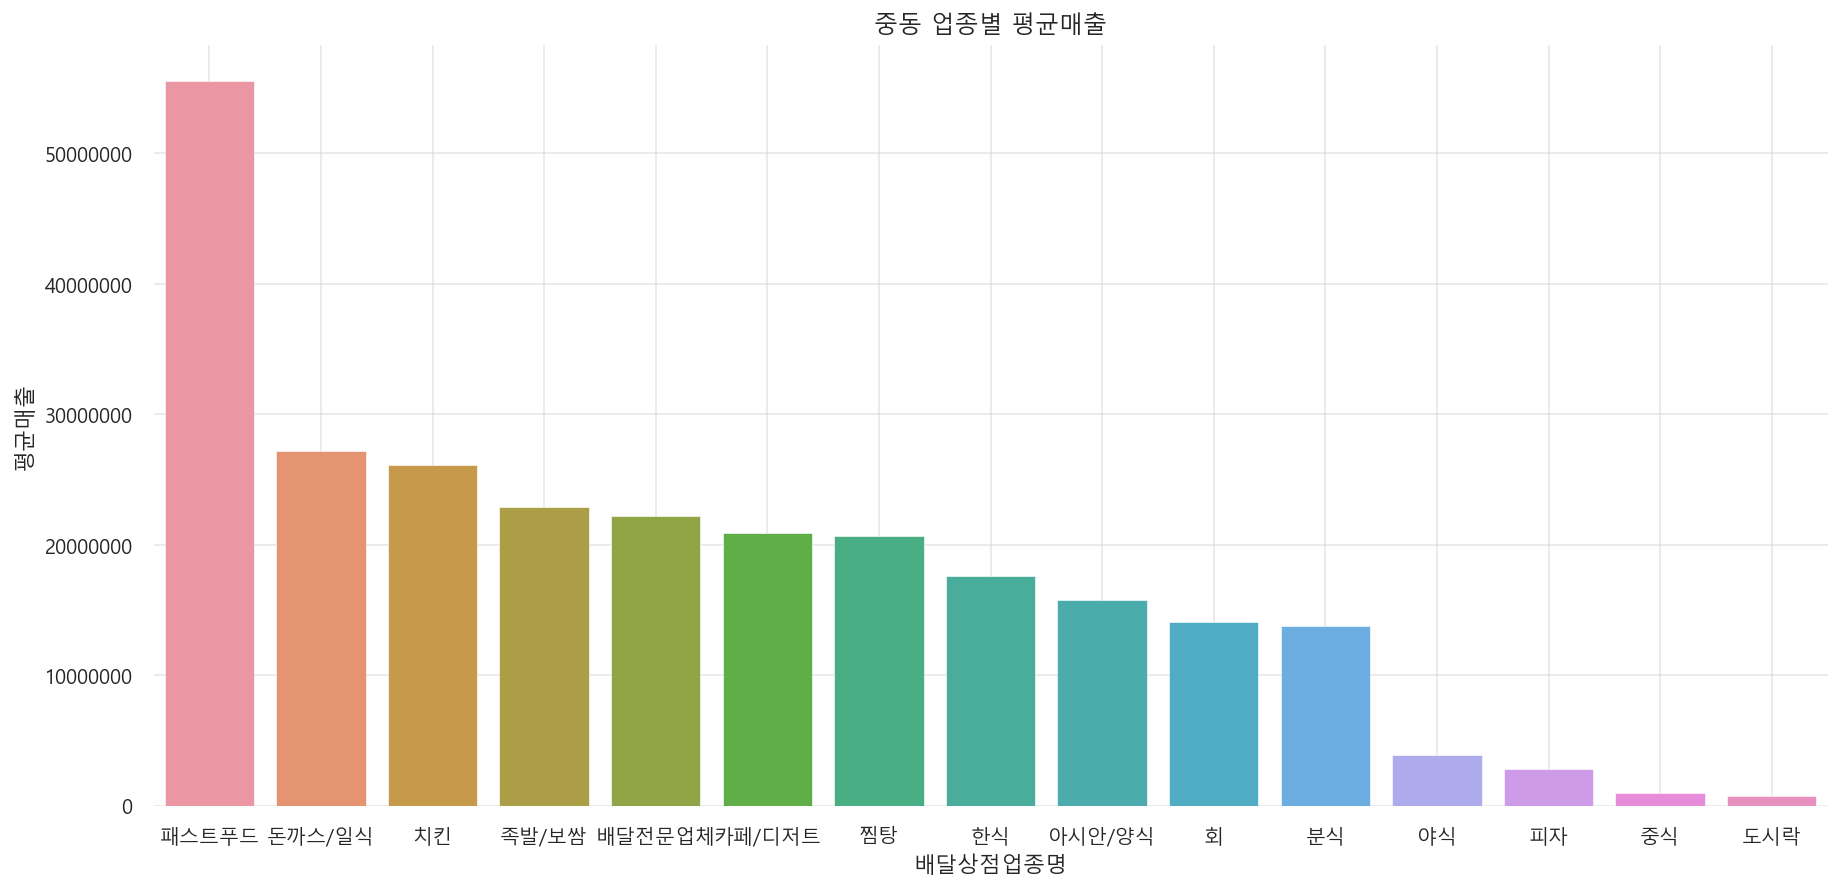

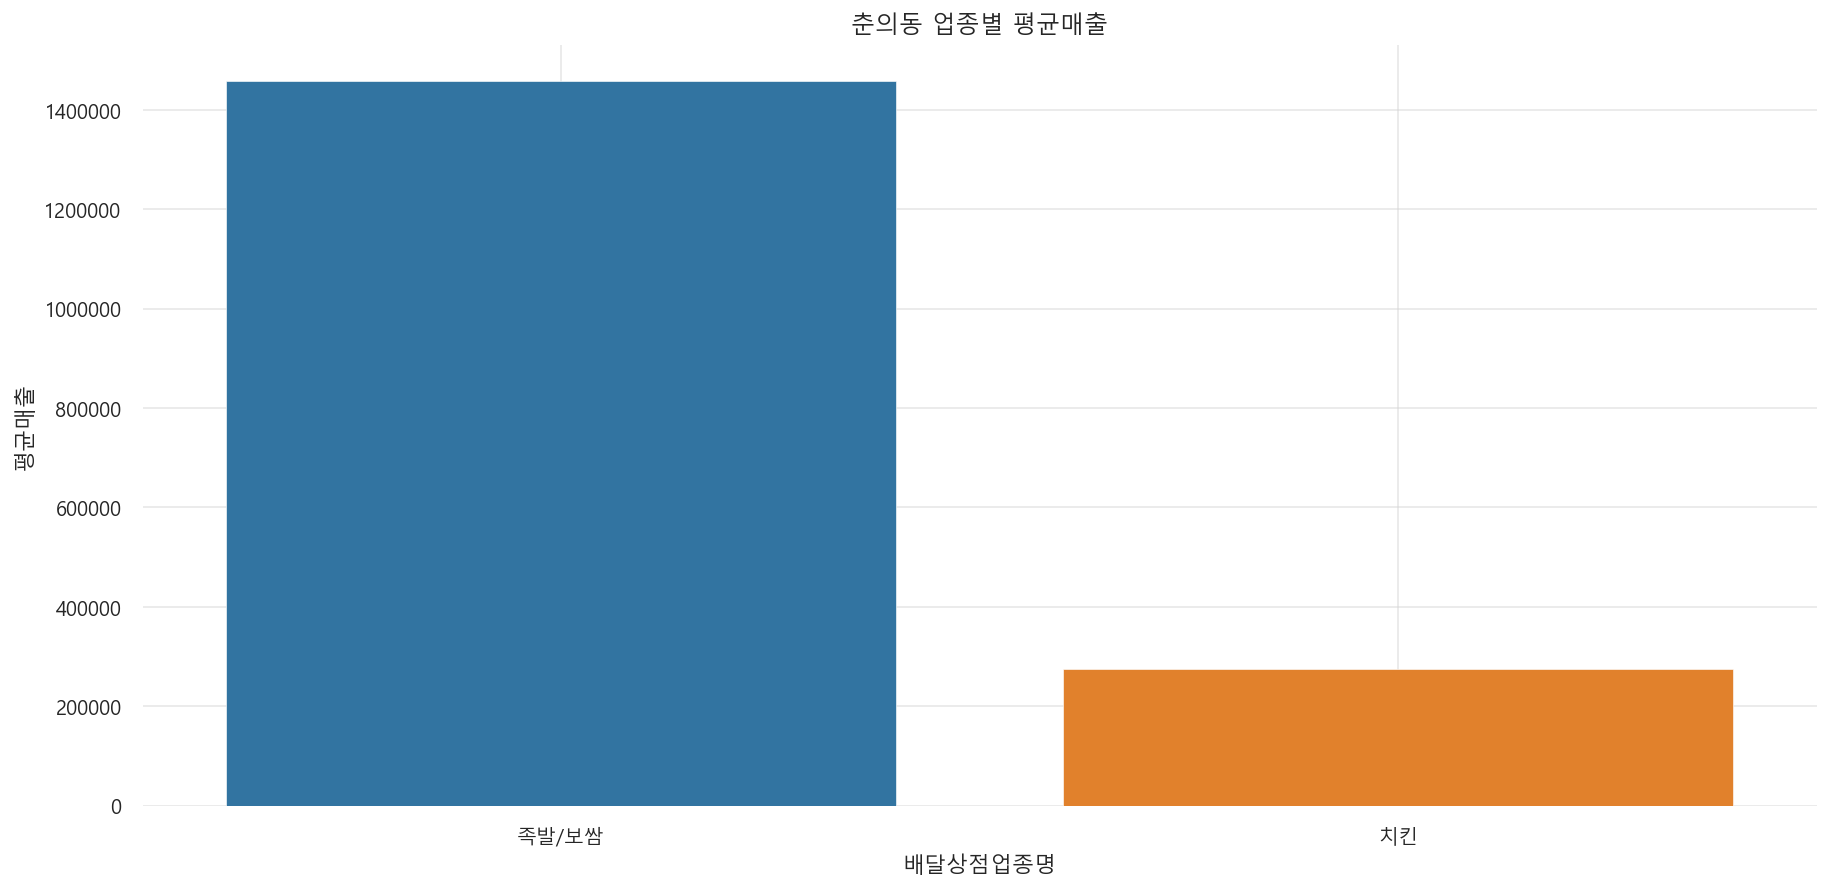

In [591]:
cols = ['괴안동', '도당동', '범박동', '삼정동', '상동', '소사동', '소사본동', '송내동',
       '심곡동', '심곡본동', '약대동', '역곡동', '옥길동', '원미동', '중동', '춘의동']

for col in cols:
    plt.figure(figsize=(15, 7))
    dt = data_store_income2.query(f"배달상점_읍면동 == '{col}'")
    ax = sns.barplot(data=dt.sort_values(by='평균매출', ascending=False), x='배달상점업종명', y='평균매출')
    ax.get_yaxis().get_major_formatter().set_scientific(False)
    plt.title(f"{col} 업종별 평균매출")
    plt.grid(color='lightgrey', alpha=0.44)

# 요약